<a href="https://colab.research.google.com/github/hnioua/Gene-Expression-Analysis-in-Colorectal-Cancer-Using-Machine-Learning/blob/main/Copie_de_Activit%C3%A9_pratique_1_MR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# 1) Préparation du dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Imports the dataset
df = pd.read_csv('colon_cancer.csv', sep=';')
df

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,1.708999,...,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989,tumoral
800,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,4.695878,1.800088,7.647284,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643,tumoral
801,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510,tumoral
802,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,3.190606,...,4.980576,4.088197,3.945064,3.426452,1.526074,4.175287,8.242634,2.225967,1.842766,tumoral


In [4]:
len(df)

804

In [5]:
print(df.columns)

Index(['ADH1C', 'DHRS11', 'UGP2', 'SLC7A5', 'CTSS', 'DAO', 'NIBAN1', 'PRUNE2',
       'FOXF2', 'TENT5C', 'KLF10', 'FABP1', 'RPSAP19', 'NCAPH', 'TPM1',
       'PLA2G12B', 'PLAAT4', 'IGLV8-61', 'GSS', 'L1TD1', 'RNF186', 'HES2',
       'MXRA8', 'SOX18', 'NDFIP2', 'SIAE', 'NEURL1B', 'DDIT4', 'TRPM4',
       'RETREG1', 'OTULINL', 'CPVL', 'SAMD9', 'ANKRD40CL', 'EPN3', 'CRYBG2',
       'GIPC2', 'P3H2', 'STEAP3', 'THNSL2', 'TRAPPC14', 'RHBDL2', 'RPP25',
       'SEMA4C', 'RNF43', 'EPS8L1', 'TOR4A', 'PAQR5', 'SIDT1', 'ESRP1',
       'SYTL2', 'BSPRY', 'CDHR2', 'ERRFI1', 'CLIC5', 'PLLP', 'GAL', 'CRYL1',
       'YBX2', 'ANGPTL4', 'tissue_status'],
      dtype='object')


Le dataset "Gene Expression of Colon Cancer" disponible sur Kaggle contient des données sur l'expression de plusieurs gènes dans des échantillons de tissus, avec un total de 804 observations.

1. Description des Colonnes :





* id_sample : Identifiant unique de chaque échantillon.

* ADH1C, DHRS11, UGP2, ... : Ces colonnes représentent l'expression de différents gènes.

* tissue_status : Indique si l'échantillon provient d'un tissu cancéreux ou sain.

2. Objectif du Dataset :

Ce dataset permet d'analyser l'expression des gènes et d'identifier des biomarqueurs potentiels pour le diagnostic ou le traitement du cancer du côlon. Il peut être utilisé pour des études de classification afin de différencier les tissus cancéreux des tissus sains en fonction de l'expression génétique.

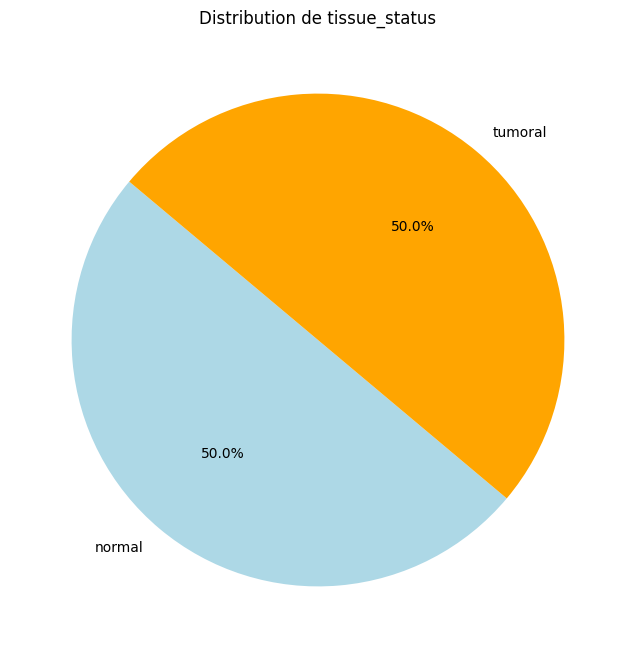

In [6]:
# Compter les occurrences des différentes catégories de la colonne 'tissue_status'
value_counts = df['tissue_status'].value_counts()

# Tracer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title(f'Distribution de tissue_status')  # Correction ici : suppression des {}
plt.show()

* L'analyse de cette distribution montre que les classes "normal" et
"tumoral" sont équilibrées, chacune représentant 50 % des données.
* Cela signifie qu'il n'y a pas de déséquilibre dans le dataset en ce qui concerne la variable tissue_status.
* Cet équilibre peut être avantageux pour l'entraînement de modèles de classification, car il évite les biais liés à une sous-représentation d'une classe par rapport à l'autre.

In [7]:
# Defining X and y
X = df.drop(['tissue_status'],axis=1)
y = df.tissue_status

In [8]:
X

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,3.951686,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,4.269728,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.050933,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.357246,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,1.906739,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360520,2.954864,1.708999,...,3.845019,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989
800,3.691606,2.118164,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,3.309359,4.695878,1.800088,7.647284,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643
801,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,2.081777,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510
802,3.021057,3.581192,4.822947,5.694947,6.789079,6.570513,1.404105,3.390414,2.653714,3.190606,...,2.137942,4.980576,4.088197,3.945064,3.426452,1.526074,4.175287,8.242634,2.225967,1.842766


In [9]:
# Vérifier si des valeurs manquantes existent dans la matrice
missing_values_X = X.isna().sum().sum()
print("Nombre de valeurs manquantes :", missing_values_X)

Nombre de valeurs manquantes : 0


In [10]:
y

,tissue_status
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
799,tumoral
800,tumoral
801,tumoral
802,tumoral


In [11]:
from sklearn.preprocessing import LabelEncoder

# Convertir les étiquettes en valeurs 0 et 1
le = LabelEncoder()
y = le.fit_transform(y)  # 'normal' -> 0, 'tumoral' -> 1
y = pd.DataFrame(y, columns=['tissue_status'])
y

,tissue_status
0,0
1,0
2,0
3,0
4,0
...,...
799,1
800,1
801,1
802,1


In [12]:
# Vérifier si des valeurs manquantes existent dans la matrice
missing_values_y = y.isna().sum().sum()
print("Nombre de valeurs manquantes :", missing_values_y)

Nombre de valeurs manquantes : 0


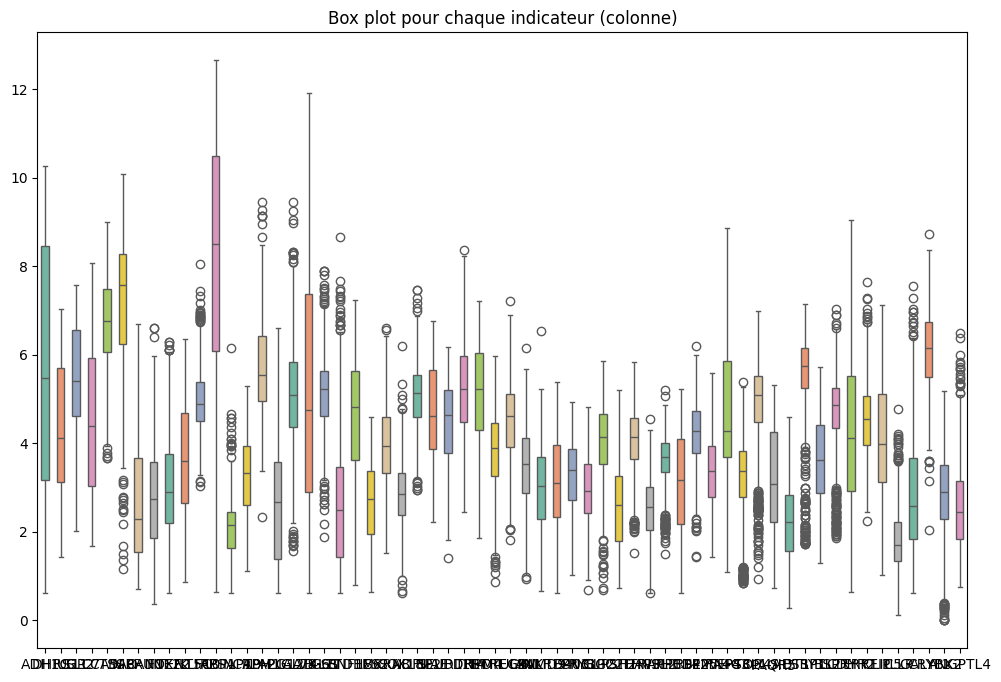

In [13]:
# Créer un box plot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, width=0.5, palette="Set2")

# Ajouter un titre
plt.title("Box plot pour chaque indicateur (colonne)")

# Afficher le graphique
plt.show()

In [14]:
outliers_count = sum(((X < (X.quantile(0.25) - 1.5 * (X.quantile(0.75) - X.quantile(0.25)))) |
                      (X > (X.quantile(0.75) + 1.5 * (X.quantile(0.75) - X.quantile(0.25))))).sum())

print(f"Nombre total de valeurs aberrantes : {outliers_count}")

Nombre total de valeurs aberrantes : 624


In [15]:
statistiques = X.describe()  # Cette méthode donne un résumé statistique
statistiques

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.588943,4.354817,5.557694,4.513570,6.717535,7.218184,2.737937,2.806573,3.064394,3.658318,...,3.599294,4.682718,4.225014,4.575397,4.097244,1.823268,2.822931,6.096634,2.801603,2.596452
std,2.889901,1.431179,1.150565,1.614450,1.077821,1.411969,1.466906,1.243826,1.191486,1.258059,...,1.054504,0.917027,1.656088,0.859138,1.276589,0.721587,1.338349,0.840122,1.011971,1.000962
min,0.610504,1.427079,2.027201,1.685024,3.668691,1.164886,0.716737,0.368200,0.610504,0.858074,...,1.286220,1.868389,0.637047,2.250347,1.015235,0.118945,0.610504,2.031471,0.000000,0.757246
25%,3.174250,3.118844,4.611060,3.030022,6.065937,6.241714,1.550382,1.864561,2.198244,2.655091,...,2.878356,4.349295,2.921069,3.958903,3.131267,1.337715,1.840902,5.489589,2.277491,1.824823
50%,5.467024,4.125990,5.412204,4.382953,6.762908,7.578782,2.297732,2.741509,2.900393,3.605686,...,3.613342,4.869313,4.116251,4.537381,3.975276,1.689671,2.591044,6.150297,2.905605,2.442378
75%,8.444756,5.696566,6.556969,5.918848,7.485487,8.263561,3.669509,3.574304,3.752899,4.686086,...,4.417632,5.249372,5.507864,5.070072,5.118110,2.211967,3.661012,6.728052,3.505721,3.139738
max,10.263846,7.022241,7.571114,8.059430,8.990703,10.079135,6.682541,6.591924,6.276628,6.350919,...,5.713776,7.029946,9.045672,7.647284,7.129499,4.763212,7.545757,8.723941,5.169059,6.493643


In [16]:
# Calculer la moyenne de chaque colonne
means = X.mean()

# Centrer le DataFrame en soustrayant la moyenne de chaque colonne
X_centered = X - means

# Afficher le DataFrame centré
X_centered

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
0,3.611001,1.735237,1.504818,-0.649317,1.151833,1.246949,-1.563272,-1.831487,-0.035399,2.692601,...,0.352391,0.845653,-0.724284,-1.681637,1.033499,-0.338158,-0.992447,0.283299,1.117690,0.434960
1,2.178675,1.673168,0.761124,-1.443990,-0.307201,0.941630,3.221477,-1.181055,-0.079765,1.027768,...,0.670433,0.989070,0.433775,0.139977,1.340860,0.308197,-0.725775,0.766539,-2.478774,1.382079
2,2.329962,1.531131,1.360048,-1.325314,1.198014,0.786009,-1.177551,-0.426664,-0.134632,0.622808,...,0.451638,-0.086639,1.424362,-0.527498,2.483695,-0.376060,1.068012,0.113070,0.472804,1.118039
3,3.464611,1.673168,1.523391,-2.156047,-1.059809,0.786009,0.811050,0.453458,0.249435,1.162754,...,0.757952,-0.547657,1.212093,-0.038016,0.518019,-0.818814,-0.982030,0.677429,0.518923,0.484344
4,0.438879,1.436440,0.379990,-0.375904,-0.898536,0.837883,0.570008,2.402301,1.127301,1.522718,...,-1.692555,-1.008675,2.061168,0.139977,0.335166,-1.664073,0.683629,0.053663,-2.340419,2.543853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.431020,-1.265453,-1.164208,1.434210,0.407063,-0.741977,0.773526,0.553947,-0.109530,-1.949320,...,0.245725,-0.039657,0.407619,0.094745,0.474435,1.041377,-0.486615,0.826929,-0.091009,-0.088463
800,-1.897337,-2.236652,-0.762907,0.233258,-1.224129,-2.090819,0.778191,-1.105336,-0.292433,-1.442838,...,-0.289936,0.013159,-2.424926,3.071888,-2.757007,1.239871,0.587205,-2.239682,-1.309786,3.897191
801,-2.553700,-1.859433,-1.119243,1.403258,0.437601,-1.661919,-1.545695,-1.637469,-2.025559,-0.824465,...,-1.517518,0.203479,-0.600195,-0.662651,-1.290869,1.347547,-2.047444,-1.144250,-0.841516,0.213057
802,-2.567885,-0.773624,-0.734747,1.181376,0.071544,-0.647672,-1.333832,0.583840,-0.410680,-0.467712,...,-1.461353,0.297858,-0.136817,-0.630332,-0.670792,-0.297195,1.352356,2.146001,-0.575636,-0.753687


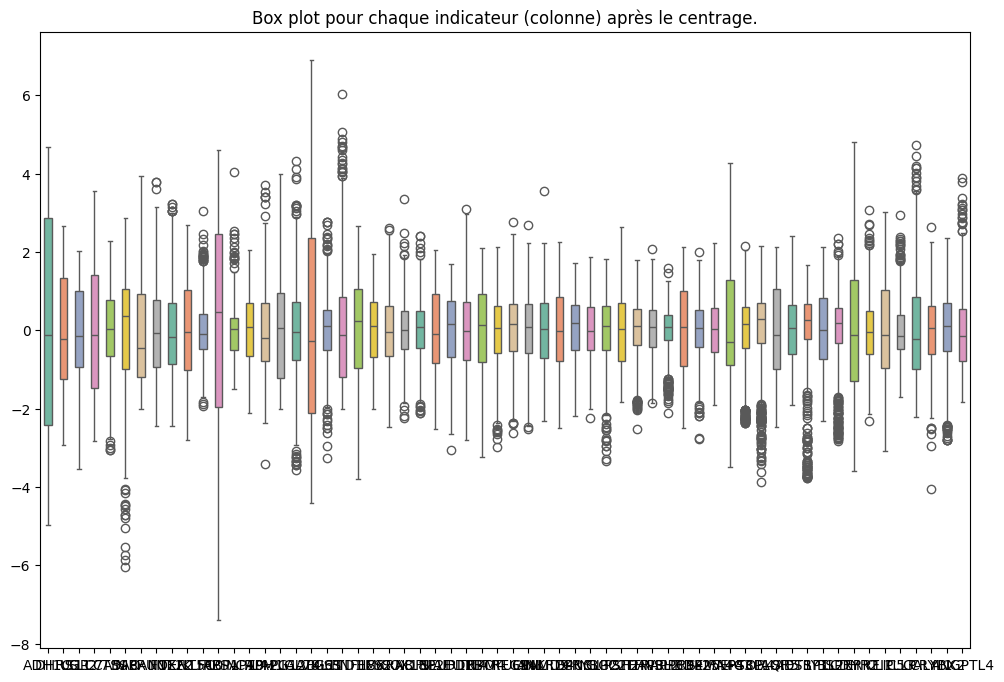

In [17]:
# Créer un box plot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_centered, width=0.5, palette="Set2")

# Ajouter un titre
plt.title("Box plot pour chaque indicateur (colonne) après le centrage.")

# Afficher le graphique
plt.show()

In [18]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_centered,y,test_size=0.25,random_state=42)

# 2) Algorithmes Utilisés (espaces d'hypothèses)

---



Nous avons testé plusieurs algorithmes de classification en explorant leurs espaces d'hypothèses :

* Régression Logistique : Modèle linéaire simple utilisé pour la classification binaire. L'espace d'hypothèses est constitué d'hyperplans linéaires séparant les classes.

* SVM (Support Vector Machine) : Algorithme efficace pour la séparation des classes dans des espaces de grande dimension. L'espace d'hypothèses inclut des frontières de décision optimisées via des marges maximales.

* k-NN (k-Nearest Neighbors) : Basé sur la proximité des points pour effectuer la classification. L'espace d'hypothèses dépend de la structure locale des données et de la valeur de k.

* Arbre de Décision : Modèle basé sur une structure arborescente pour prendre des décisions. L'espace d'hypothèses est défini par un ensemble de règles de partitionnement des données.

* Forêt Aléatoire : Ensemble d'arbres de décision pour améliorer la robustesse et réduire le surapprentissage. L'espace d'hypothèses est plus large grâce à la combinaison de plusieurs modèles indépendants

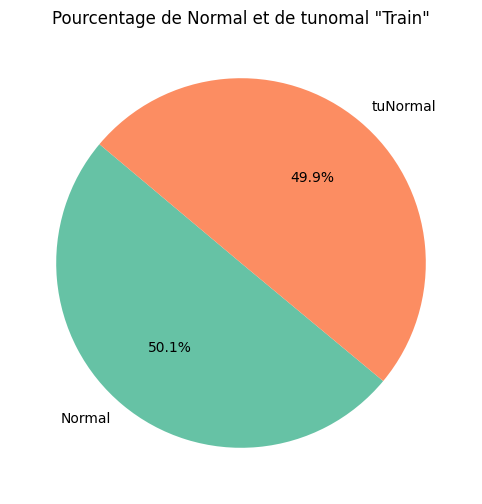

In [19]:
# Calculer les pourcentages de chaque classe 'colon_cancer'
total_samples = len(y_train)
diabetes_counts = y_train.value_counts()
percentage_diabetes = (diabetes_counts / total_samples) * 100

# Données à représenter
labels = ['Normal', 'tuNormal']
sizes = percentage_diabetes.values

# Création du cercle
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)

# Afficher les pourcentages
plt.title('Pourcentage de Normal et de tunomal "Train"')

plt.show()

* les données d'entraînement sont équilibrées avec une
répartition presque égale entre les classes "Normal" et "tuNormal" (50.1 % vs 49.9 %). Il n'est donc pas nécessaire d'appliquer des techniques de rééquilibrage comme `l'oversampling` ou `l'undersampling`.

In [20]:
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#  Modèle de régression logistique pour classer les échantillons sur toutes ensembles de données par la `**sélection des features.**`




* Les performances sur l'entraînement et le test sont très proches, et la validation croisée donne une précision similaire. Cela indique qu'il n'y a pas de surapprentissage (overfitting), car le modèle généralise bien sur des données non vues.



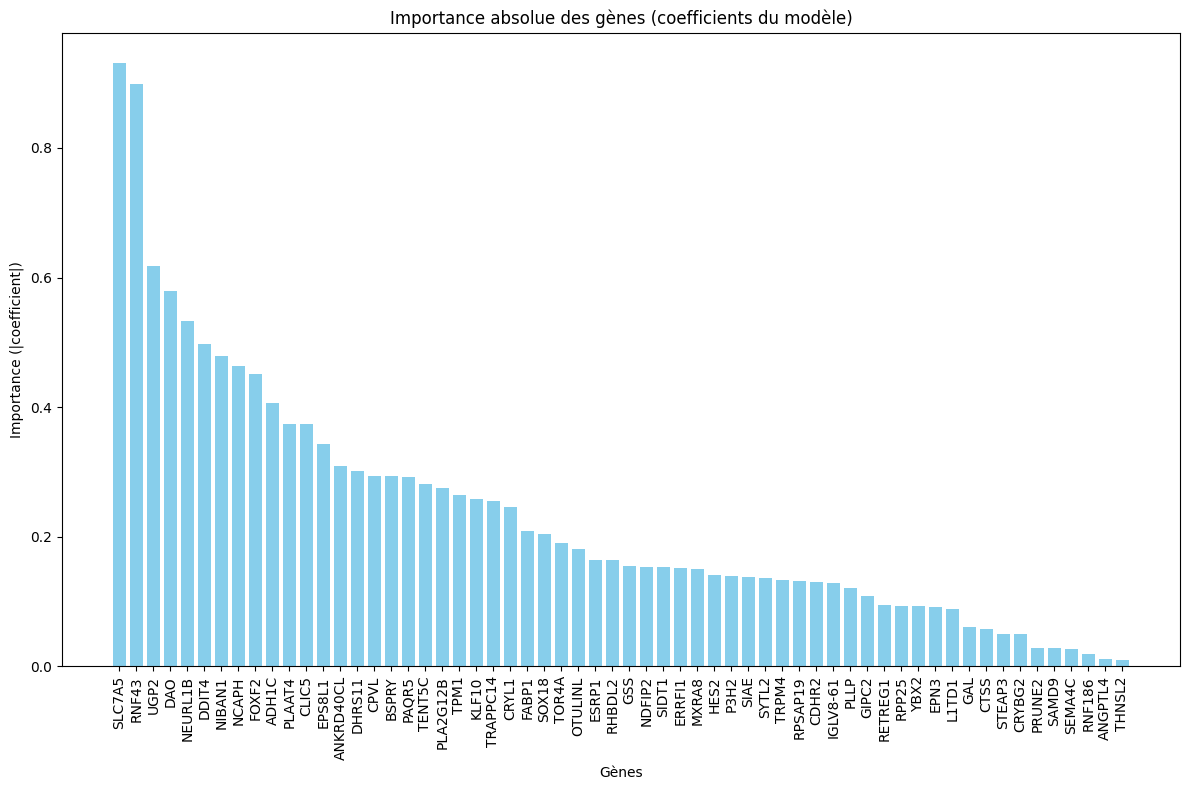

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_centered, y)

# Récupérer les coefficients en valeur absolue
coefficients = abs(model.coef_[0])

# Créer un DataFrame avec les gènes et leur importance
importance_df = pd.DataFrame({
    'Gene': X_centered.columns,
    'Importance': coefficients
})

# Trier par importance décroissante
importance_df_sorted_log = importance_df.sort_values(by='Importance', ascending=False)

# Affichage du graphe en barres
plt.figure(figsize=(12, 8))
plt.bar(importance_df_sorted_log['Gene'], importance_df_sorted_log['Importance'], color='skyblue')
plt.title("Importance absolue des gènes (coefficients du modèle)")
plt.xlabel("Gènes")
plt.ylabel("Importance (|coefficient|)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


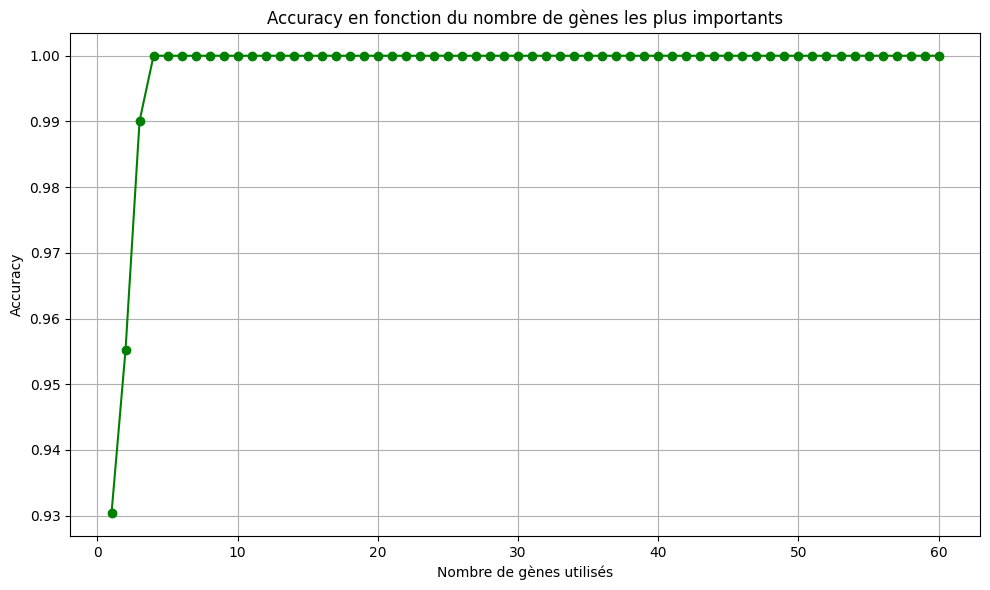

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparer les données en train/test
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_centered, y, test_size=0.25, random_state=42)

accuracies = []
gene_counts = list(range(1, 61))

# Initialize the model outside the loop
model_log = LogisticRegression(max_iter=1000)

# Fit the model once to get the coefficients
model_log.fit(X_train_log, y_train_log)  # Fit the model here

# Trier les gènes par importance absolue
coefficients = abs(model.coef_[0])
importance_df = pd.DataFrame({
    'Gene': X_centered.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Boucle sur 1 à 60 gènes les plus importants
for n in gene_counts:
    top_genes_log = importance_df['Gene'].head(n).values
    X_train_top_log = X_train_log[top_genes_log]
    X_test_top_log = X_test_log[top_genes_log]

    model_n = LogisticRegression(max_iter=1000)
    model_n.fit(X_train_top_log, y_train_log)
    y_pred_log = model_n.predict(X_test_top_log)
    acc_log = accuracy_score(y_test_log, y_pred_log)
    accuracies.append(acc_log)

# Affichage de la courbe accuracy
plt.figure(figsize=(10, 6))
plt.plot(gene_counts, accuracies, marker='o', color='green')
plt.title("Accuracy en fonction du nombre de gènes les plus importants")
plt.xlabel("Nombre de gènes utilisés")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# 1. Récupération des 4 gènes les plus importants
top_genes_log = importance_df['Gene'].head(6).values
X_top_log= X_centered[top_genes_log]

# Afficher le DataFrame des 4 gènes les plus importants
print("Dataset des 4 gènes les plus importants :")
X_top_log.head()

Dataset des 4 gènes les plus importants :


,SLC7A5,RNF43,UGP2,DAO,NEURL1B,DDIT4
0,-0.649317,-0.334810,1.504818,1.246949,0.449203,0.596563
1,-1.443990,-0.574077,0.761124,0.941630,0.271003,-0.886884
2,-1.325314,-1.128903,1.360048,0.786009,0.531318,-0.337999
3,-2.156047,-0.920843,1.523391,0.786009,0.635444,-1.115586
4,-0.375904,-0.712784,0.379990,0.837883,0.765601,-1.024106


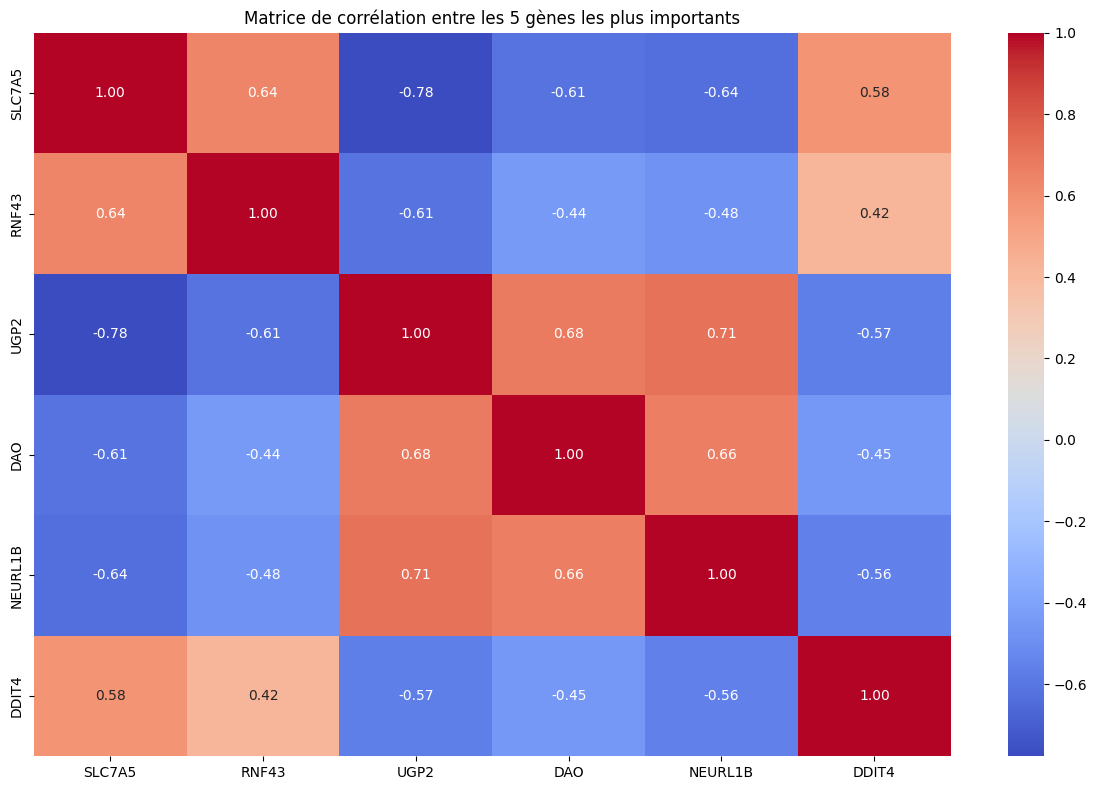

In [24]:
# 2. Construction de la matrice de corrélation
correlation_matrix_log = X_top_log.corr()


# Optionnel : afficher sous forme de carte de chaleur
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les 5 gènes les plus importants")
plt.tight_layout()
plt.show()

In [25]:
# Seuil de corrélation
threshold = 0.68

# Matrice de corrélation absolue
corr_matrix_log = X_top_log.corr().abs()

# Supprimer la diagonale (corrélation avec soi-même)
upper = corr_matrix_log.where(np.triu(np.ones(corr_matrix_log.shape), k=1).astype(bool))

# Trouver les colonnes à supprimer
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Gènes à supprimer :", to_drop)

# Nouveau DataFrame sans les gènes trop corrélés
X_reduced_log = X_top_log.drop(columns=to_drop)


Gènes à supprimer : ['UGP2', 'NEURL1B']


In [26]:
X_reduced_log

,SLC7A5,RNF43,DAO,DDIT4
0,-0.649317,-0.334810,1.246949,0.596563
1,-1.443990,-0.574077,0.941630,-0.886884
2,-1.325314,-1.128903,0.786009,-0.337999
3,-2.156047,-0.920843,0.786009,-1.115586
4,-0.375904,-0.712784,0.837883,-1.024106
...,...,...,...,...
799,1.434210,-1.054506,-0.741977,0.023049
800,0.233258,-2.119945,-2.090819,1.847134
801,1.403258,-2.416398,-1.661919,1.214807
802,1.181376,1.696529,-0.647672,0.114320


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Étape 1 : Séparer les données
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_reduced_log, y, test_size=0.25, random_state=42)

# Étape 2 : Entraînement du modèle
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_log, y_train_log)

# Étape 3 : Prédictions
y_pred_log = model_log.predict(X_test_log)

# Étape 4 : Accuracy
accuracy_log = accuracy_score(y_test_log, y_pred_log)
print(f"\nAccuracy du modèle après suppression des gènes corrélés (seuil 0.60) : {accuracy_log:.4f}")



Accuracy du modèle après suppression des gènes corrélés (seuil 0.60) : 0.9950


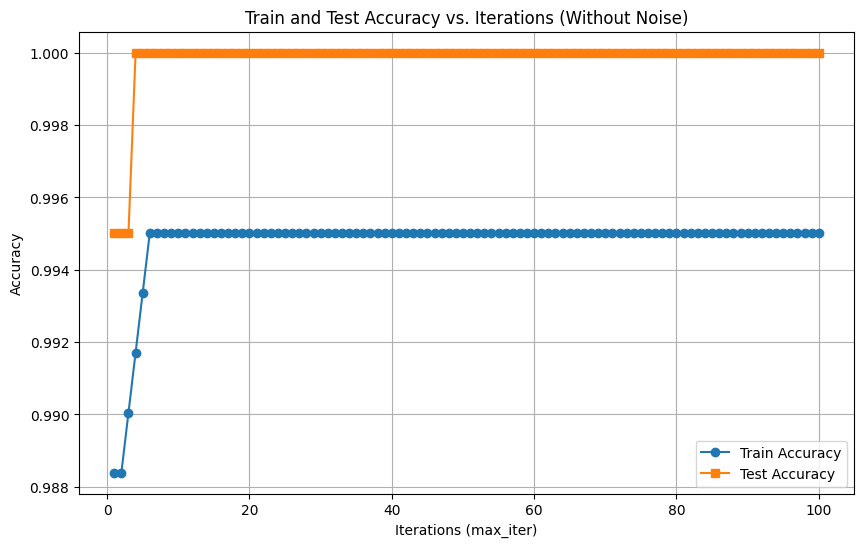


Final Test Accuracy: 1.0000


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignorer les avertissements de type UserWarning
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Étape 1 : Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X_reduced_log, y, test_size=0.25, random_state=42)

# Initialiser les listes pour stocker les précisions
train_accuracies_log = []
test_accuracies_log = []

# Plage d'itérations (ajustez si nécessaire)
iterations = np.arange(1, 101)

# Étape 2 : Entraînement et évaluation du modèle pour chaque itération
for i in iterations:
    model_log = LogisticRegression(solver='liblinear', max_iter=i)  # Utilisation de l'itération actuelle comme max_iter
    model_log.fit(X_train, y_train)  # Entraînement sur les données d'entraînement sans bruit

    # Calcul et stockage de la précision d'entraînement (sur les données d'entraînement)
    y_train_pred_log = model_log.predict(X_train)
    train_acc_log = accuracy_score(y_train, y_train_pred_log)
    train_accuracies_log.append(train_acc_log)

    # Calcul et stockage de la précision de test (sur les données de test originales)
    y_pred_log = model_log.predict(X_test)
    test_acc_log = accuracy_score(y_test, y_pred_log)
    test_accuracies_log.append(test_acc_log)

# Étape 3 : Affichage des courbes d'accuracy avec ajustement de l'échelle
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies_log, label='Train Accuracy', marker='o')
plt.plot(iterations, test_accuracies_log, label='Test Accuracy', marker='s')
plt.xlabel('Iterations (max_iter)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Iterations (Without Noise)')
plt.legend()
plt.grid(True)
plt.show()

# Affichage de la précision finale de test
print(f"\nFinal Test Accuracy: {test_accuracies_log[-1]:.4f}")


# KNN de régression logistique pour classer les échantillons sur toutes ensembles de données par la **sélection des features.**

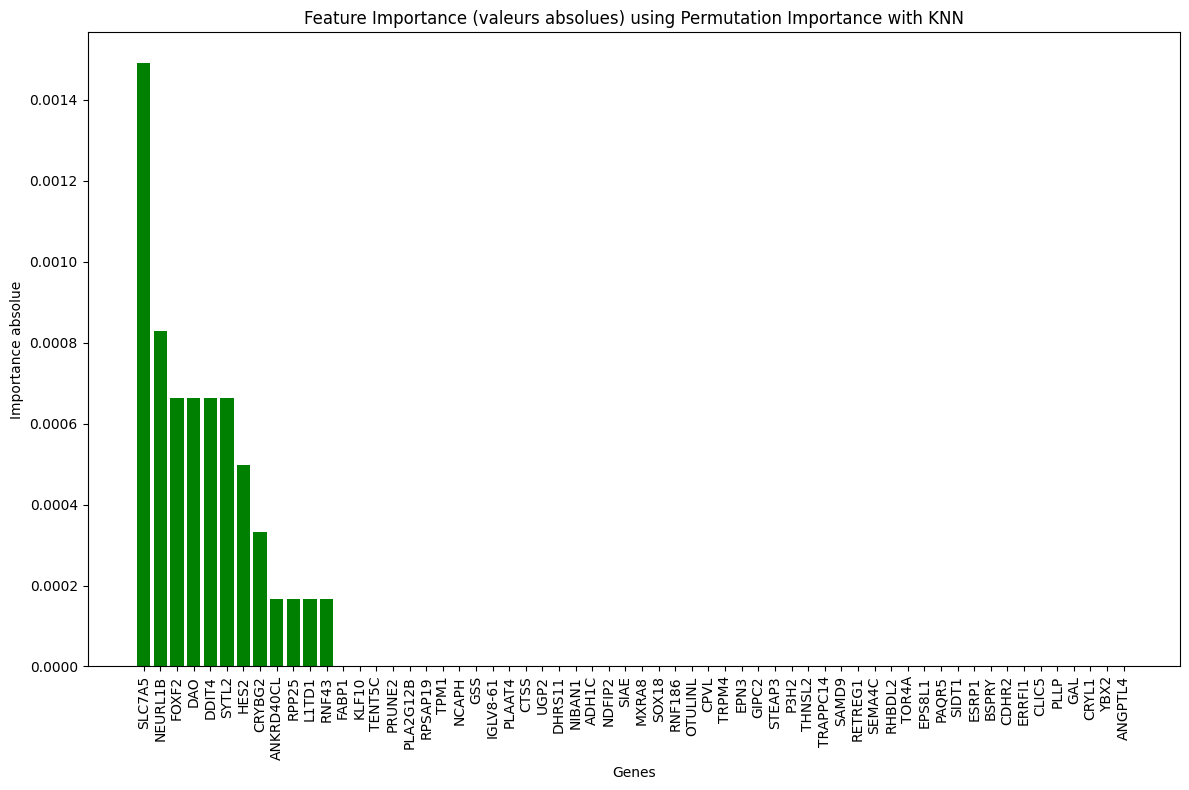

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance



# Splitting data into train and test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_centered, y, test_size=0.25, random_state=42)

# Normalization (optional, but often recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_knn)
X_test_scaled = scaler.transform(X_test_knn)

# Calculate permutation importance
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_knn)
result = permutation_importance(
    knn, X_train_scaled, y_train_knn, n_repeats=10, random_state=42
)

# Get feature importances (valeurs absolues)
importance = np.abs(result.importances_mean)

# Create a DataFrame for importances
importance_df_rfecv = pd.DataFrame({
    'Gene': X_centered.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(importance_df_rfecv['Gene'], importance_df_rfecv['Importance'], color='green')
plt.title("Feature Importance (valeurs absolues) using Permutation Importance with KNN")
plt.xlabel("Genes")
plt.ylabel("Importance absolue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


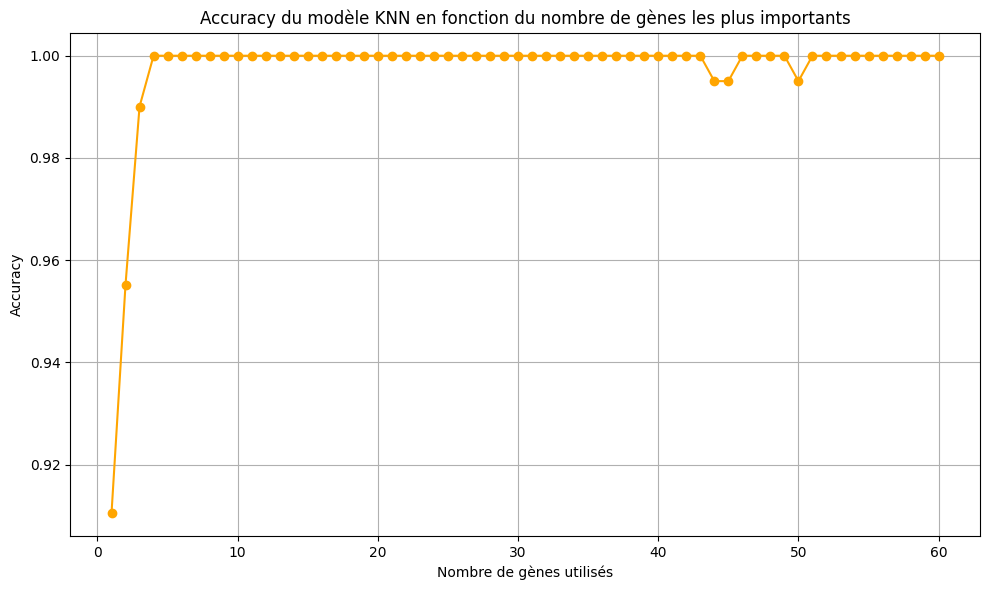

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Séparer les données en train/test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_centered, y, test_size=0.25, random_state=42)

accuracies = []
gene_counts = list(range(1, 61))

# Importance des gènes avec permutation importance (déjà calculée auparavant)
# On réutilise ici importance_df_sorted_knn
importance_df_sorted_knn = importance_df.sort_values(by='Importance', ascending=False)

# Boucle sur 1 à 60 gènes les plus importants
for n in gene_counts:
    top_genes_knn = importance_df_sorted_knn['Gene'].head(n).values
    X_train_top_knn = X_train_knn[top_genes_knn]
    X_test_top_knn = X_test_knn[top_genes_knn]

    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train_top_knn, y_train_knn)
    y_pred_knn = model_knn.predict(X_test_top_knn)
    acc_knn = accuracy_score(y_test_knn, y_pred_knn)
    accuracies.append(acc_knn)

# Affichage de la courbe accuracy
plt.figure(figsize=(10, 6))
plt.plot(gene_counts, accuracies, marker='o', color='orange')
plt.title("Accuracy du modèle KNN en fonction du nombre de gènes les plus importants")
plt.xlabel("Nombre de gènes utilisés")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# Afficher le top 6 des gènes les plus importants
top_6_genes = importance_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 6 des gènes les plus importants :")
print(top_6_genes)


Top 6 des gènes les plus importants :
       Gene  Importance
3    SLC7A5    0.930992
44    RNF43    0.898030
2      UGP2    0.618031
5       DAO    0.579717
26  NEURL1B    0.533608


In [32]:
# 1. Récupération des 4 gènes les plus importants
top_genes_knn = importance_df_sorted_knn['Gene'].head(5).values
X_top_knn= X_centered[top_genes_knn]

# Afficher le DataFrame des 4 gènes les plus importants
print("Dataset des 6 gènes les plus importants :")
X_top_knn.head()

Dataset des 6 gènes les plus importants :


,SLC7A5,RNF43,UGP2,DAO,NEURL1B
0,-0.649317,-0.334810,1.504818,1.246949,0.449203
1,-1.443990,-0.574077,0.761124,0.941630,0.271003
2,-1.325314,-1.128903,1.360048,0.786009,0.531318
3,-2.156047,-0.920843,1.523391,0.786009,0.635444
4,-0.375904,-0.712784,0.379990,0.837883,0.765601


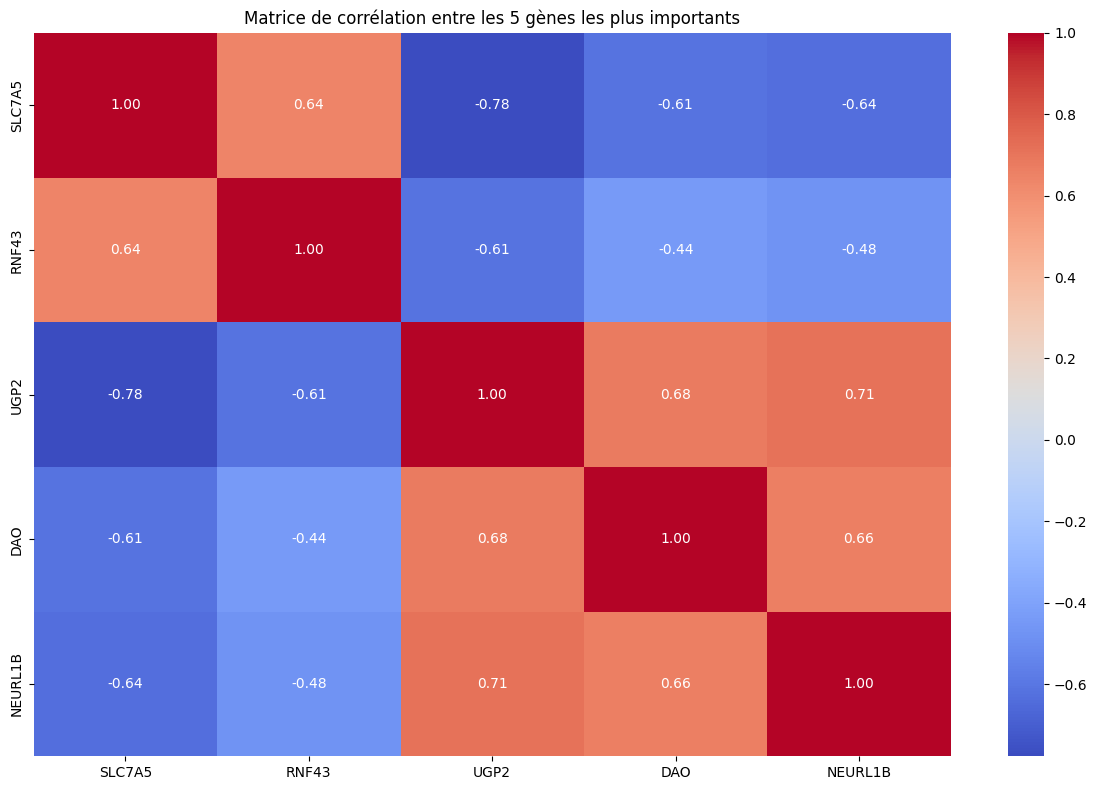

In [33]:
# 2. Construction de la matrice de corrélation
correlation_matrix_knn = X_top_knn.corr()


# Optionnel : afficher sous forme de carte de chaleur
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_knn, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les 5 gènes les plus importants")
plt.tight_layout()
plt.show()

In [34]:
# Seuil de corrélation
threshold = 0.70

# Matrice de corrélation absolue
corr_matrix_knn = X_top_knn.corr().abs()

# Supprimer la diagonale (corrélation avec soi-même)
upper = corr_matrix_knn.where(np.triu(np.ones(corr_matrix_knn.shape), k=1).astype(bool))

# Initialiser les gènes à conserver avec tous
genes_to_keep = set(X_top_knn.columns)

# Créer un dictionnaire {gène: importance}
importance_dict = importance_df_sorted_knn.set_index('Gene')['Importance'].to_dict()

# Parcourir les paires corrélées
for col in upper.columns:
    for row in upper.index:
        if pd.notna(upper.loc[row, col]) and upper.loc[row, col] > threshold:
            # Vérifier que les deux gènes sont encore dans la liste
            if row in genes_to_keep and col in genes_to_keep:
                # Comparer les importances
                if importance_dict.get(row, 0) >= importance_dict.get(col, 0):
                    genes_to_keep.discard(col)
                else:
                    genes_to_keep.discard(row)

# Nouveau DataFrame sans les gènes les moins importants et trop corrélés
X_reduced_knn = X_top_knn[list(genes_to_keep)]

print(f"Gènes conservés après suppression basée sur l'importance : {len(X_reduced_knn.columns)}")
print(f"Gènes supprimés : {set(X_top_knn.columns) - genes_to_keep}") # Print removed genes

# Afficher X_reduced_knn (facultatif)
X_reduced_knn.head()

Gènes conservés après suppression basée sur l'importance : 4
Gènes supprimés : {'UGP2'}


,SLC7A5,RNF43,DAO,NEURL1B
0,-0.649317,-0.334810,1.246949,0.449203
1,-1.443990,-0.574077,0.941630,0.271003
2,-1.325314,-1.128903,0.786009,0.531318
3,-2.156047,-0.920843,0.786009,0.635444
4,-0.375904,-0.712784,0.837883,0.765601


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Étape 1 : Séparer les données
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_reduced_knn, y, test_size=0.25, random_state=42)

# Étape 2 : Entraînement du modèle
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_knn, y_train_knn)

# Étape 3 : Prédictions
y_pred_knn = model_knn.predict(X_test_knn)

# Étape 4 : Accuracy
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"\nAccuracy du modèle après suppression des gènes corrélés (seuil 0.70) : {accuracy_knn:.4f}")



Accuracy du modèle après suppression des gènes corrélés (seuil 0.70) : 1.0000


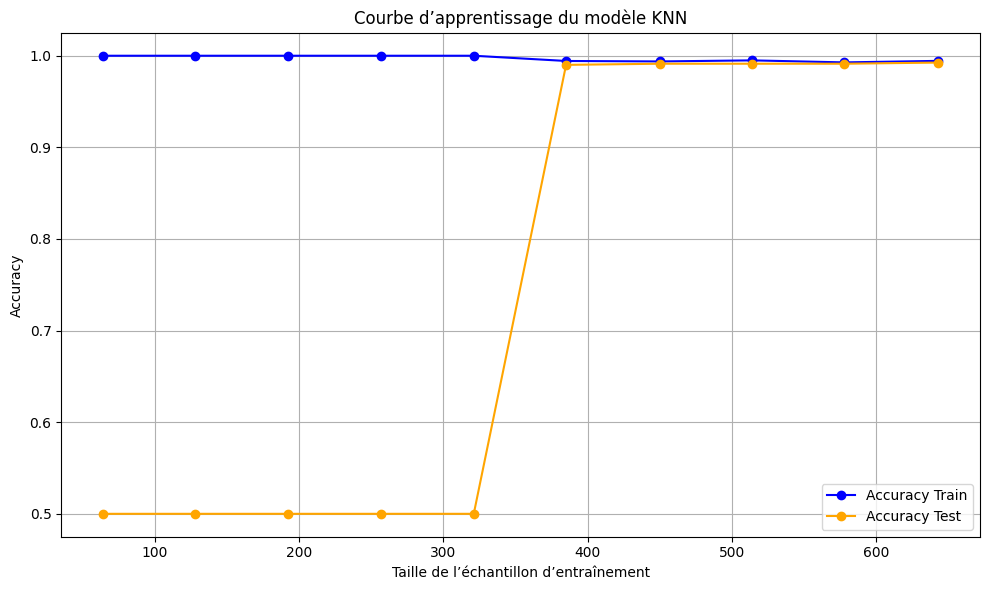

In [36]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Définir le modèle
model_knn = KNeighborsClassifier(n_neighbors=5)

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_knn,
    X=X_reduced_knn,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Utilise tous les cœurs pour aller plus vite (optionnel)
)

# Moyennes et écarts-types
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Accuracy Train')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Accuracy Test')
plt.title('Courbe d’apprentissage du modèle KNN')
plt.xlabel('Taille de l’échantillon d’entraînement')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


Meilleur k : 1 avec une accuracy de 1.0000


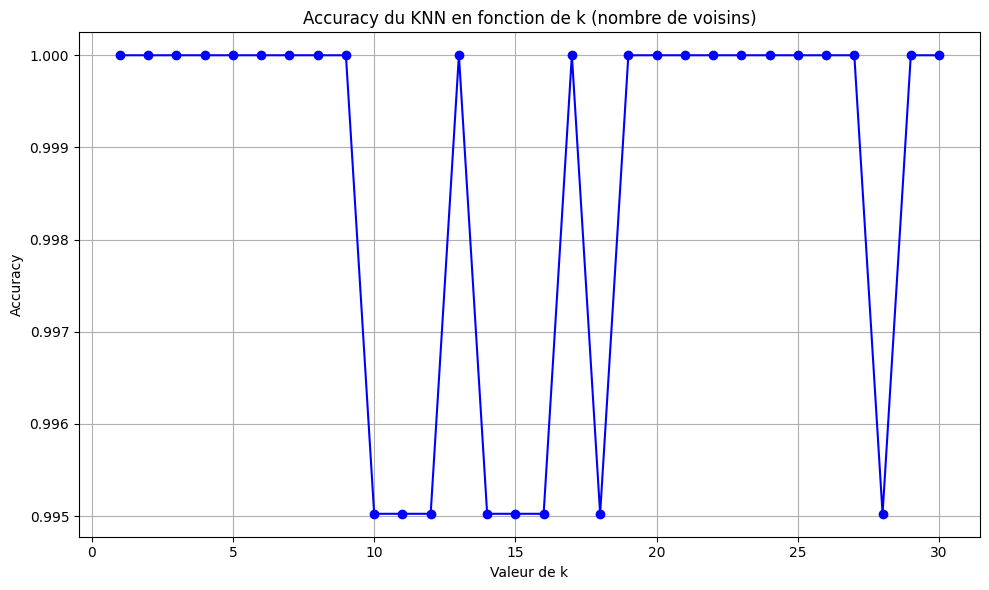

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Étape 1 : Séparer les données
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_reduced_knn, y, test_size=0.25, random_state=42)

# Étape 2 : Tester plusieurs valeurs de k
k_values = range(1, 31)
accuracies = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = model_knn.predict(X_test_knn)
    acc = accuracy_score(y_test_knn, y_pred_knn)
    accuracies.append(acc)

# Étape 3 : Afficher le meilleur k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Meilleur k : {best_k} avec une accuracy de {max(accuracies):.4f}")

# Étape 4 : Courbe
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Accuracy du KNN en fonction de k (nombre de voisins)")
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


# SVM de régression logistique pour classer les échantillons sur toutes ensembles de données par la sélection des features.

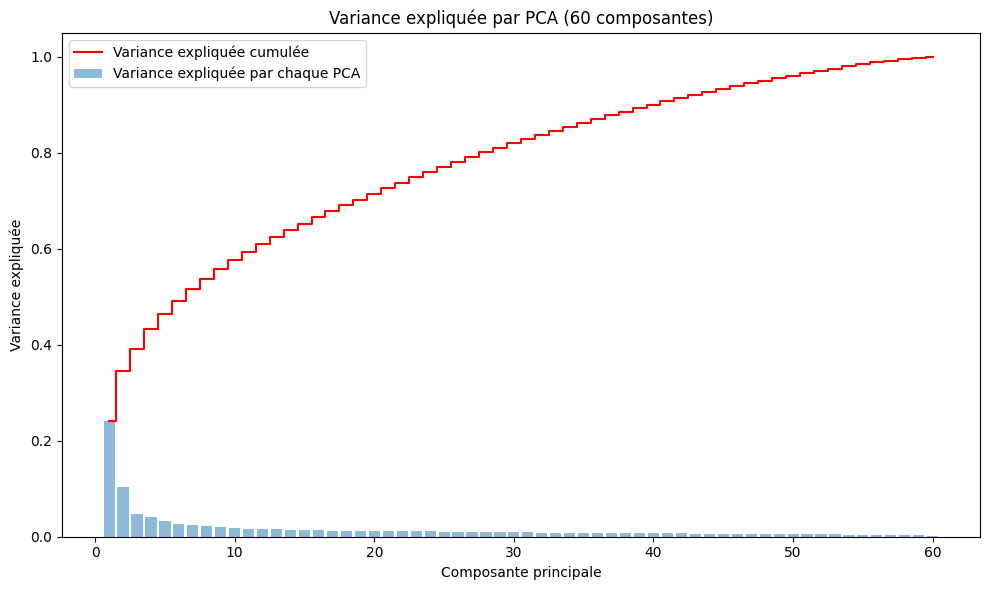

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_centered)

# PCA avec 60 composantes
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée pour chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot de la variance expliquée
plt.figure(figsize=(10, 6))
plt.bar(range(1, 61), explained_variance_ratio, alpha=0.5, align='center', label='Variance expliquée par chaque PCA')
plt.step(range(1, 61), cumulative_variance_ratio, where='mid', color='red', label='Variance expliquée cumulée')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par PCA (60 composantes)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


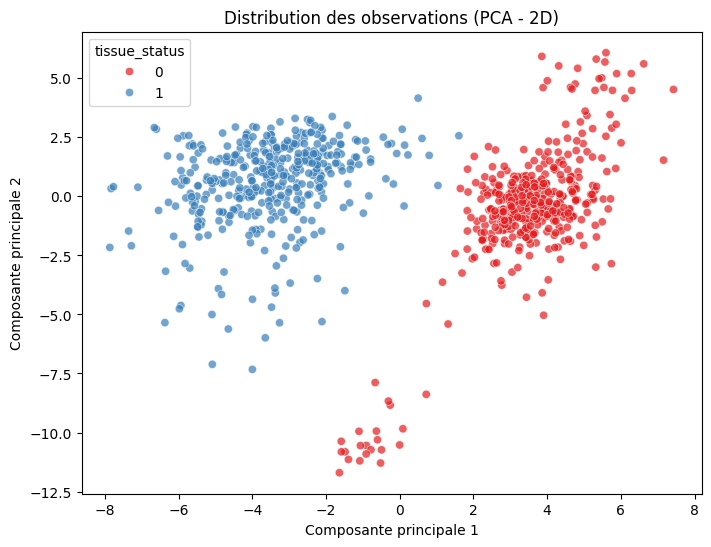

In [39]:
from sklearn.decomposition import PCA

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_centered)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Before the scatterplot line
y_series = y.iloc[:, 0]  # Convert y to a Series using the first (and only) column

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_series, palette='Set1', alpha=0.7)  # Use y_series
plt.title('Distribution des observations (PCA - 2D)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

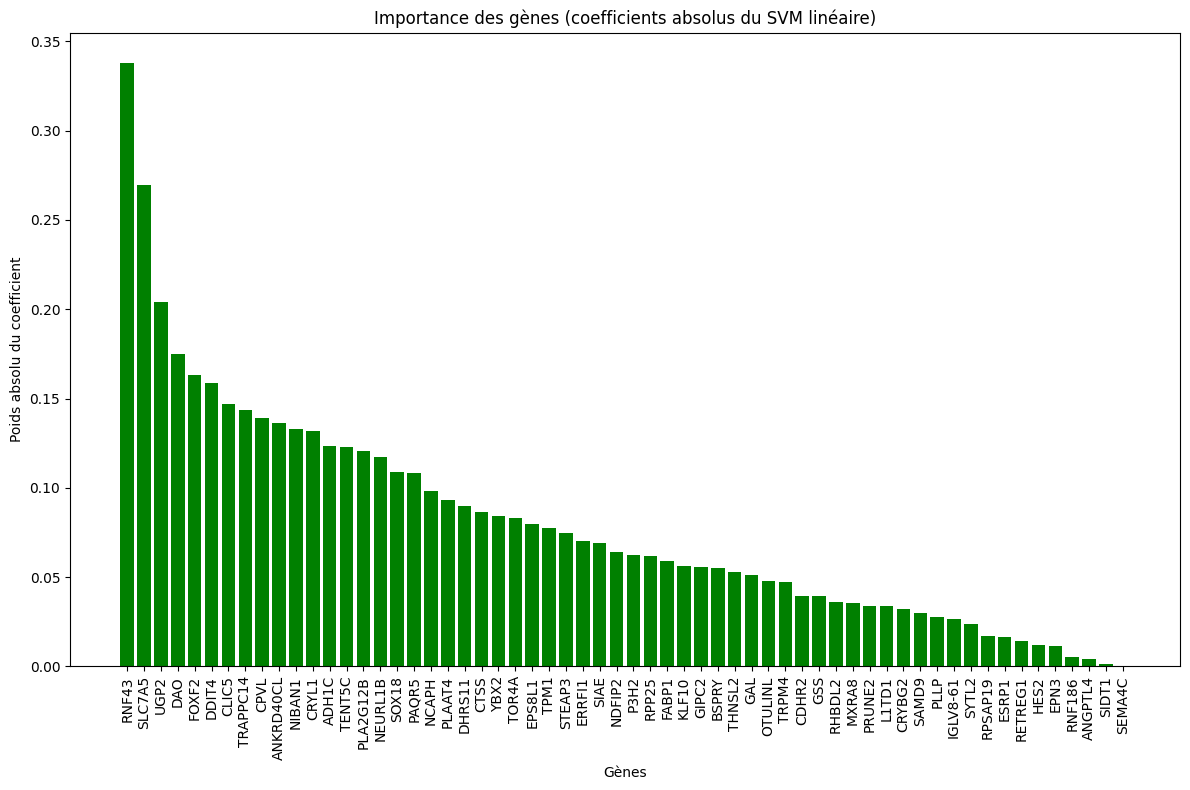

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# Splitting data into train and test
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_centered, y, test_size=0.25, random_state=42)

# Normalization (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_svm)
X_test_scaled = scaler.transform(X_test_svm)

# Initialize and fit the SVM model
svm = SVC(kernel='linear', C=0.5, random_state=42)  # C < 1 pour une marge plus souple
# You can change kernel to 'rbf', 'poly', etc. if you want
svm.fit(X_train_scaled, y_train_svm)

# Calculate permutation importance
result = permutation_importance(
    svm, X_train_scaled, y_train_svm, n_repeats=60, random_state=42
)

# Extraire les coefficients du modèle SVM (valeurs absolues)
coef_abs = np.abs(svm.coef_[0])

# Créer un DataFrame avec les coefficients
coef_df = pd.DataFrame({
    'Gene': X_centered.columns,
    'Coefficient': coef_abs
}).sort_values(by='Coefficient', ascending=False)

# Affichage des 20 gènes les plus importants selon SVM (coef)
plt.figure(figsize=(12, 8))
plt.bar(coef_df['Gene'][:60], coef_df['Coefficient'][:60], color='green')
plt.title("Importance des gènes (coefficients absolus du SVM linéaire)")
plt.xlabel("Gènes")
plt.ylabel("Poids absolu du coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


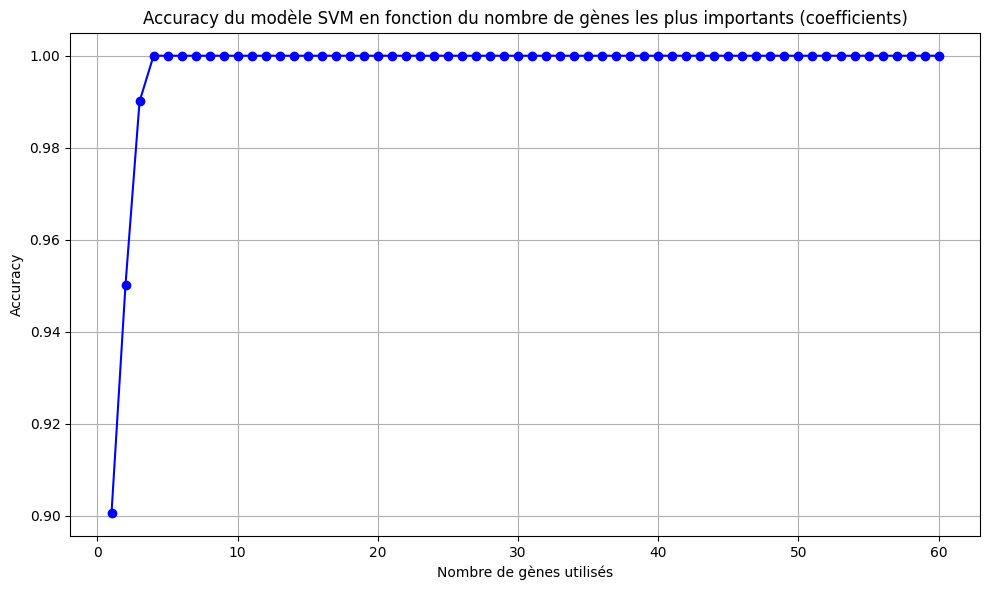

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Re-séparation pour cohérence
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_centered, y, test_size=0.25, random_state=42)

accuracies_svm = []
gene_counts = list(range(1, 61))

# Tri des gènes selon l’importance (coefficients absolus)
importance_df_svm_coef = coef_df.sort_values(by='Coefficient', ascending=False)

for n in gene_counts:
    top_genes = importance_df_svm_coef['Gene'].head(n).values
    X_train_top = X_train_svm[top_genes]
    X_test_top = X_test_svm[top_genes]

    # Normalisation
    scaler = StandardScaler()
    X_train_top_scaled = scaler.fit_transform(X_train_top)
    X_test_top_scaled = scaler.transform(X_test_top)

    model_svm = SVC(kernel='linear', C=0.5, random_state=42)
    model_svm.fit(X_train_top_scaled, y_train_svm)
    y_pred = model_svm.predict(X_test_top_scaled)
    acc = accuracy_score(y_test_svm, y_pred)
    accuracies_svm.append(acc)

# Affichage de la courbe accuracy
plt.figure(figsize=(10, 6))
plt.plot(gene_counts, accuracies_svm, marker='o', color='blue')
plt.title("Accuracy du modèle SVM en fonction du nombre de gènes les plus importants (coefficients)")
plt.xlabel("Nombre de gènes utilisés")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# 1. Récupération des 6 gènes les plus importants selon les coefficients SVM
top_genes_svm = coef_df.sort_values(by='Coefficient', ascending=False)['Gene'].head(6).values
X_top_svm = X_centered[top_genes_svm]

# 2. Affichage du DataFrame correspondant
print("Dataset des 6 gènes les plus importants selon SVM :")
X_top_svm.head()


Dataset des 6 gènes les plus importants selon SVM :


,RNF43,SLC7A5,UGP2,DAO,FOXF2,DDIT4
0,-0.334810,-0.649317,1.504818,1.246949,-0.035399,0.596563
1,-0.574077,-1.443990,0.761124,0.941630,-0.079765,-0.886884
2,-1.128903,-1.325314,1.360048,0.786009,-0.134632,-0.337999
3,-0.920843,-2.156047,1.523391,0.786009,0.249435,-1.115586
4,-0.712784,-0.375904,0.379990,0.837883,1.127301,-1.024106


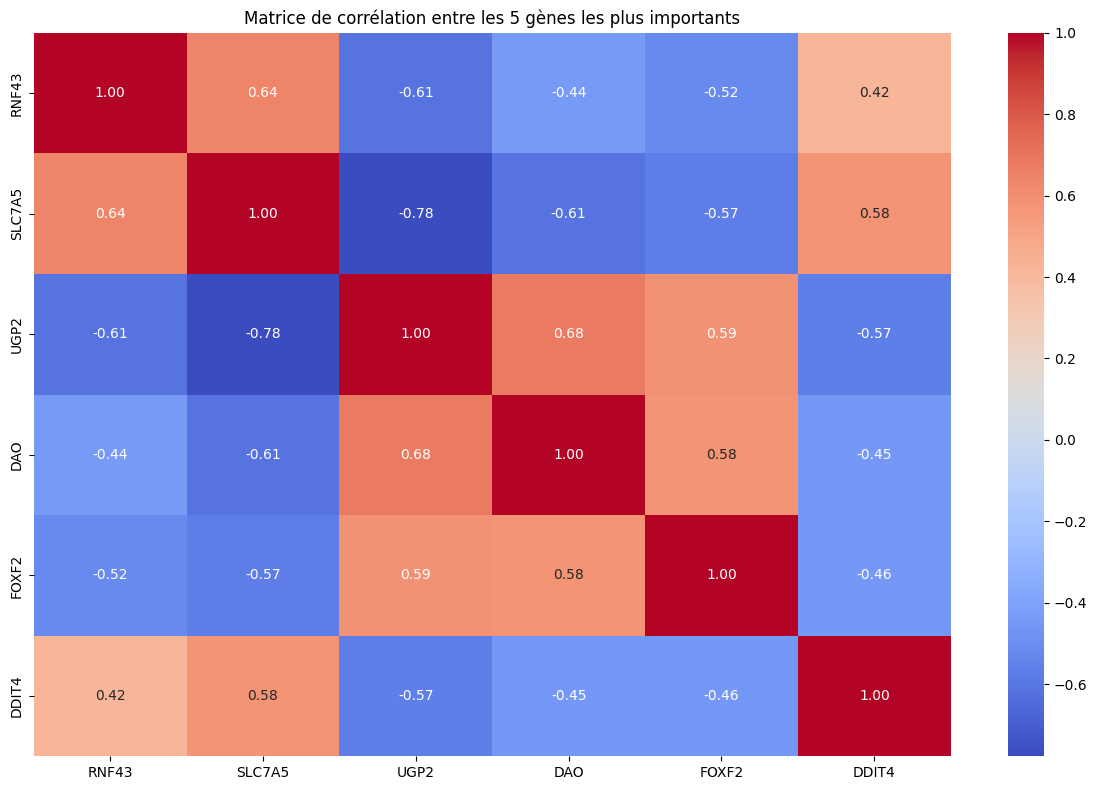

In [43]:
# 2. Construction de la matrice de corrélation
correlation_matrix_svm = X_top_svm.corr()


# Optionnel : afficher sous forme de carte de chaleur
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_svm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les 5 gènes les plus importants")
plt.tight_layout()
plt.show()

In [44]:
# Seuil de corrélation
threshold = 0.70

# 1. Matrice de corrélation absolue
corr_matrix_svm = X_top_svm.corr().abs()

# 2. Supprimer la diagonale (corrélation avec soi-même)
upper = corr_matrix_svm.where(np.triu(np.ones(corr_matrix_svm.shape), k=1).astype(bool))

# 3. Initialiser la liste de gènes à garder
genes_to_keep = set(X_top_svm.columns)

# 4. Dictionnaire d'importance des gènes
importance_dict = importance_df_rfecv.set_index('Gene')['Importance'].to_dict()

# 5. Supprimer les gènes trop corrélés en gardant le plus important
for col in upper.columns:
    for row in upper.index:
        if pd.notna(upper.loc[row, col]) and upper.loc[row, col] > threshold:
            if row in genes_to_keep and col in genes_to_keep:
                if importance_dict.get(row, 0) >= importance_dict.get(col, 0):
                    genes_to_keep.discard(col)
                else:
                    genes_to_keep.discard(row)

# 6. Nouveau DataFrame réduit
X_reduced_svm = X_top_svm[list(genes_to_keep)]

# 7. Affichage
print(f"Gènes conservés après suppression basée sur l'importance et la corrélation : {len(X_reduced_svm.columns)}")
print(f"Gènes supprimés : {set(X_top_svm.columns) - genes_to_keep}")

# 8. Affichage du DataFrame réduit
X_reduced_svm.head()


Gènes conservés après suppression basée sur l'importance et la corrélation : 5
Gènes supprimés : {'UGP2'}


,SLC7A5,RNF43,DAO,DDIT4,FOXF2
0,-0.649317,-0.334810,1.246949,0.596563,-0.035399
1,-1.443990,-0.574077,0.941630,-0.886884,-0.079765
2,-1.325314,-1.128903,0.786009,-0.337999,-0.134632
3,-2.156047,-0.920843,0.786009,-1.115586,0.249435
4,-0.375904,-0.712784,0.837883,-1.024106,1.127301


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Étape 1 : Séparer les données
X_train_svm_corr, X_test_svm_corr, y_train_svm_corr, y_test_svm_corr = train_test_split(
    X_reduced_svm, y, test_size=0.25, random_state=42
)

# Étape 2 : Normalisation (important pour SVM)
scaler_corr = StandardScaler()
X_train_scaled_corr = scaler_corr.fit_transform(X_train_svm_corr)
X_test_scaled_corr = scaler_corr.transform(X_test_svm_corr)

# Étape 3 : Entraînement du modèle SVM
model_svm_corr = SVC(kernel='linear', C=0.5, random_state=42)
model_svm_corr.fit(X_train_scaled_corr, y_train_svm_corr)

# Étape 4 : Prédictions
y_pred_svm_corr = model_svm_corr.predict(X_test_scaled_corr)

# Étape 5 : Accuracy
accuracy_svm_corr = accuracy_score(y_test_svm_corr, y_pred_svm_corr)
print(f"\n Accuracy du modèle SVM après suppression des gènes corrélés (seuil 0.70) : {accuracy_svm_corr:.4f}")



 Accuracy du modèle SVM après suppression des gènes corrélés (seuil 0.70) : 1.0000


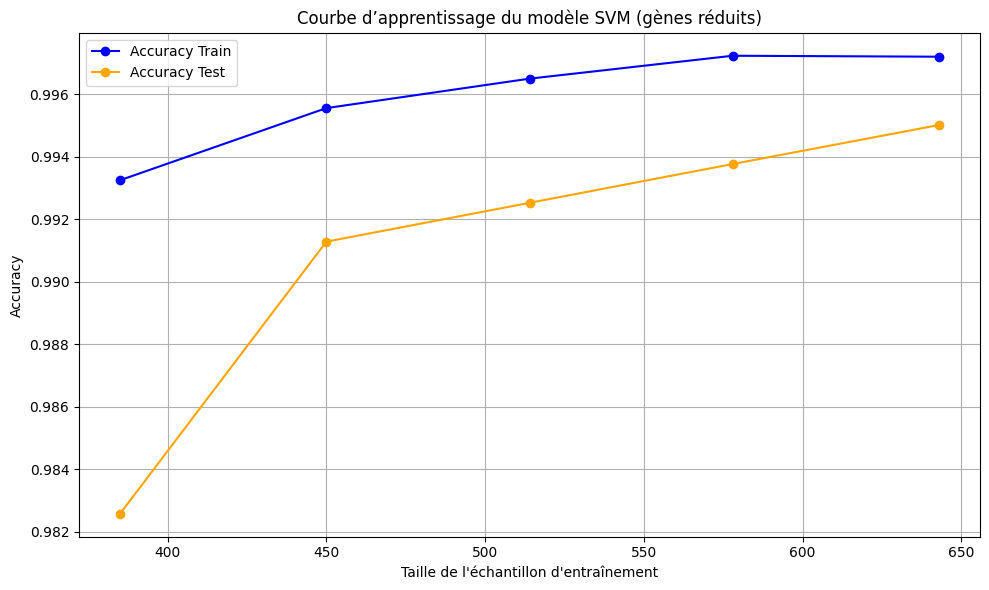

In [46]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import FitFailedWarning

# Ignorer les avertissements liés aux erreurs de fitting
warnings.filterwarnings('ignore', category=FitFailedWarning)

# Normalisation (nécessaire pour SVM)
scaler_svm = StandardScaler()
X_scaled_svm = scaler_svm.fit_transform(X_reduced_svm)

# Définir le modèle SVM
model_svm = SVC(kernel='linear', C=0.5, random_state=42)

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_svm,
    X=X_scaled_svm,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Moyennes des scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Tracer la courbe d’apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Accuracy Train')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Accuracy Test')
plt.title('Courbe d’apprentissage du modèle SVM (gènes réduits)')
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


# Decison tree pour classer les échantillons sur toutes ensembles de données par la sélection des features.

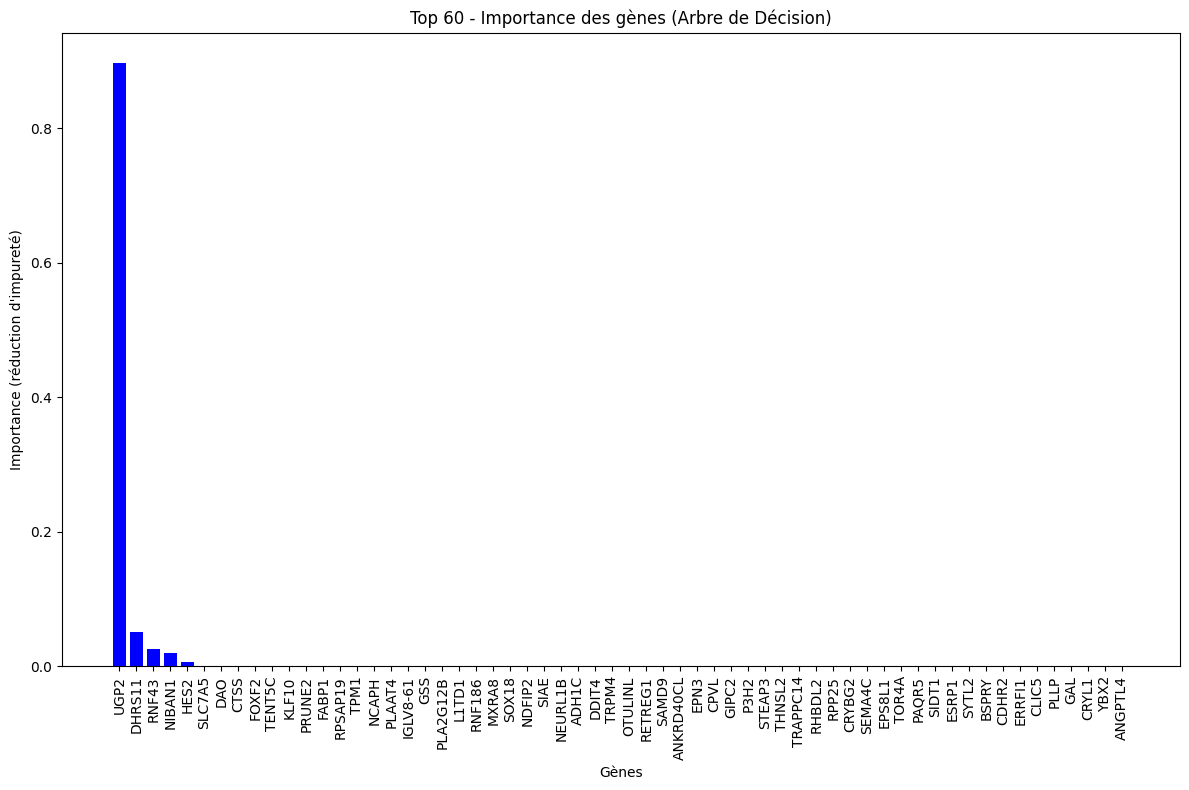

In [47]:
import numpy as np
import pandas as pd
import seaborn as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# Splitting data into train and test
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_centered, y, test_size=0.25, random_state=42)

# Initialize and fit the Decision Tree model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_dt, y_train_dt)

# Calculate permutation importance
result_dt = permutation_importance(
    dt, X_train_dt, y_train_dt, n_repeats=60, random_state=42
)

# Extraire l’importance des features (valeurs absolues des importances)
importances_abs = dt.feature_importances_

# Créer un DataFrame avec les importances
importances_df = pd.DataFrame({
    'Gene': X_centered.columns,
    'Importance': importances_abs
}).sort_values(by='Importance', ascending=False)

# Affichage des 20 gènes les plus importants selon Decision Tree
plt.figure(figsize=(12, 8))
plt.bar(importances_df['Gene'][:60], importances_df['Importance'][:60], color='blue')
plt.title("Top 60 - Importance des gènes (Arbre de Décision)")
plt.xlabel("Gènes")
plt.ylabel("Importance (réduction d'impureté)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


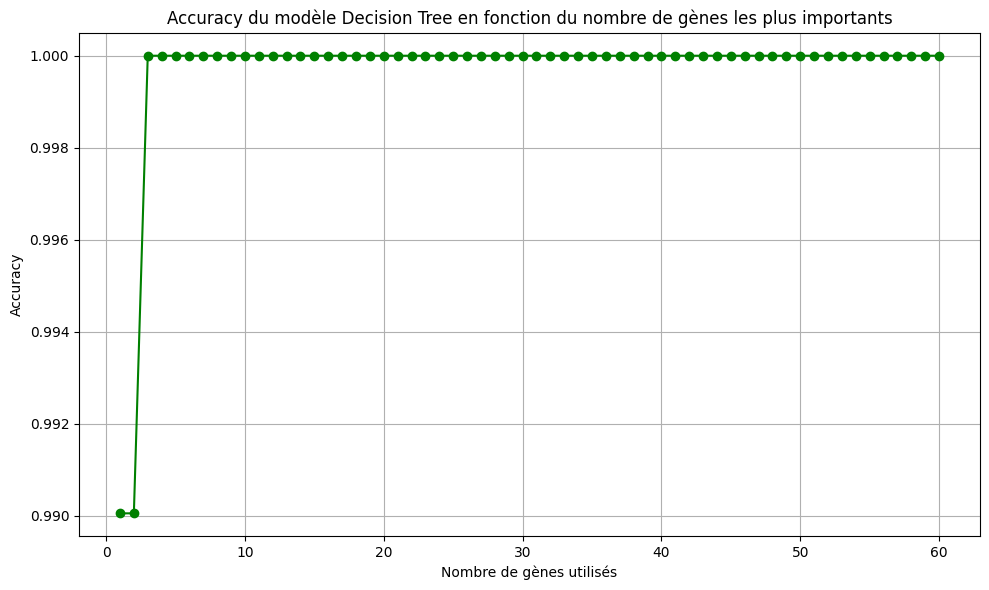

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Re-séparation pour cohérence
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_centered, y, test_size=0.25, random_state=42)

accuracies_dt = []
gene_counts = list(range(1, 61))

# Tri des gènes selon l’importance (feature_importances_)
importance_df_dt = importances_df.sort_values(by='Importance', ascending=False)

for n in gene_counts:
    top_genes = importance_df_dt['Gene'].head(n).values
    X_train_top = X_train_dt[top_genes]
    X_test_top = X_test_dt[top_genes]

    model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    model_dt.fit(X_train_top, y_train_dt)
    y_pred = model_dt.predict(X_test_top)
    acc = accuracy_score(y_test_dt, y_pred)
    accuracies_dt.append(acc)

# Affichage de la courbe accuracy
plt.figure(figsize=(10, 6))
plt.plot(gene_counts, accuracies_dt, marker='o', color='green')
plt.title("Accuracy du modèle Decision Tree en fonction du nombre de gènes les plus importants")
plt.xlabel("Nombre de gènes utilisés")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
# 1. Récupération des 6 gènes les plus importants selon Decision Tree
top_genes_dt = importances_df.sort_values(by='Importance', ascending=False)['Gene'].head(3).values
X_top_dt = X_centered[top_genes_dt]

# 2. Affichage du DataFrame correspondant
print("Dataset des 6 gènes les plus importants selon Decision Tree :")
X_top_dt.head()


Dataset des 6 gènes les plus importants selon Decision Tree :


,UGP2,DHRS11,RNF43
0,1.504818,1.735237,-0.334810
1,0.761124,1.673168,-0.574077
2,1.360048,1.531131,-1.128903
3,1.523391,1.673168,-0.920843
4,0.379990,1.436440,-0.712784


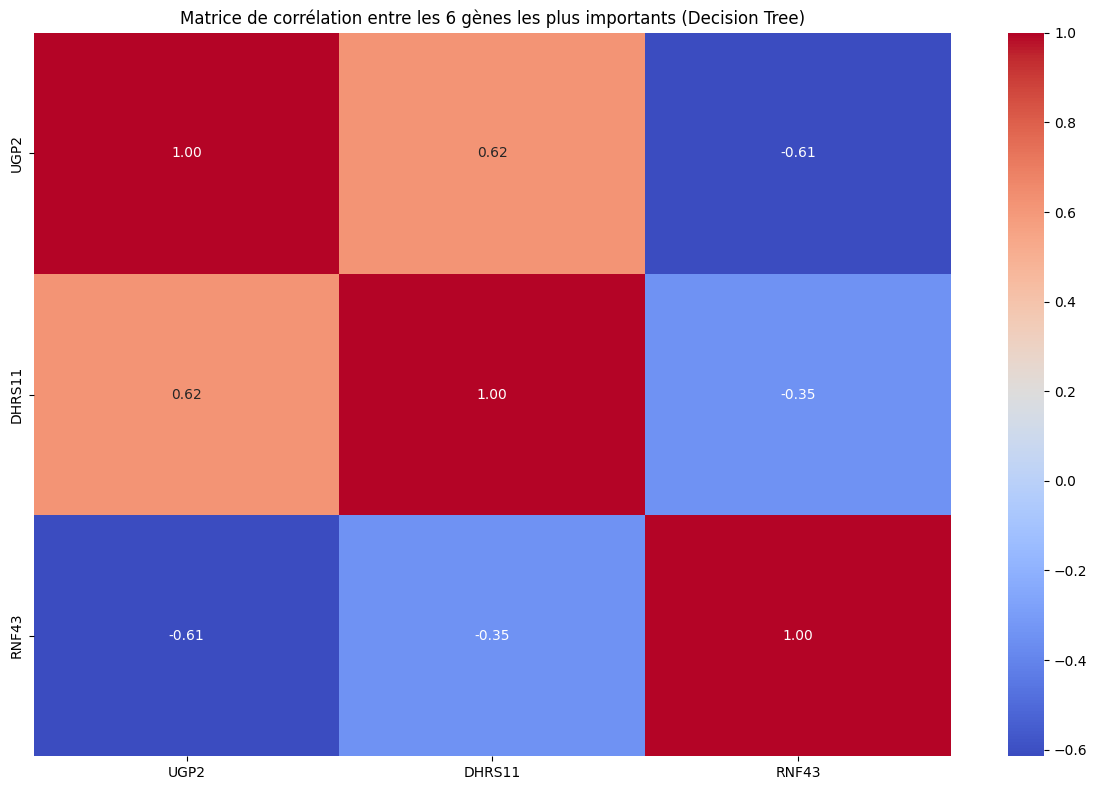

In [50]:
# 2. Construction de la matrice de corrélation pour Decision Tree
correlation_matrix_dt = X_top_dt.corr()

# Optionnel : afficher sous forme de carte de chaleur
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_dt, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les 6 gènes les plus importants (Decision Tree)")
plt.tight_layout()
plt.show()


In [51]:
# Seuil de corrélation
threshold = 0.70

# 1. Matrice de corrélation absolue pour Decision Tree
corr_matrix_dt = X_top_dt.corr().abs()

# 2. Supprimer la diagonale (corrélation avec soi-même)
upper_dt = corr_matrix_dt.where(np.triu(np.ones(corr_matrix_dt.shape), k=1).astype(bool))

# 3. Initialiser la liste de gènes à garder
genes_to_keep_dt = set(X_top_dt.columns)

# 4. Dictionnaire d'importance des gènes (basé sur Decision Tree)
importance_dict_dt = importances_df.set_index('Gene')['Importance'].to_dict()

# 5. Supprimer les gènes trop corrélés en gardant le plus important
for col in upper_dt.columns:
    for row in upper_dt.index:
        if pd.notna(upper_dt.loc[row, col]) and upper_dt.loc[row, col] > threshold:
            if row in genes_to_keep_dt and col in genes_to_keep_dt:
                if importance_dict_dt.get(row, 0) >= importance_dict_dt.get(col, 0):
                    genes_to_keep_dt.discard(col)
                else:
                    genes_to_keep_dt.discard(row)

# 6. Nouveau DataFrame réduit
X_reduced_dt = X_top_dt[list(genes_to_keep_dt)]

# 7. Affichage
print(f"Gènes conservés après suppression basée sur l'importance et la corrélation (Decision Tree) : {len(X_reduced_dt.columns)}")
print(f"Gènes supprimés : {set(X_top_dt.columns) - genes_to_keep_dt}")

# 8. Affichage du DataFrame réduit
X_reduced_dt.head()


Gènes conservés après suppression basée sur l'importance et la corrélation (Decision Tree) : 3
Gènes supprimés : set()


,RNF43,UGP2,DHRS11
0,-0.334810,1.504818,1.735237
1,-0.574077,0.761124,1.673168
2,-1.128903,1.360048,1.531131
3,-0.920843,1.523391,1.673168
4,-0.712784,0.379990,1.436440


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Étape 1 : Séparer les données
X_train_dt_corr, X_test_dt_corr, y_train_dt_corr, y_test_dt_corr = train_test_split(
    X_reduced_dt, y, test_size=0.25, random_state=42
)

# Étape 2 : Entraînement du modèle Decision Tree (pas besoin de normalisation)
model_dt_corr = DecisionTreeClassifier(max_depth=10, random_state=42)
model_dt_corr.fit(X_train_dt_corr, y_train_dt_corr)

# Étape 3 : Prédictions
y_pred_dt_corr = model_dt_corr.predict(X_test_dt_corr)

# Étape 4 : Accuracy
accuracy_dt_corr = accuracy_score(y_test_dt_corr, y_pred_dt_corr)
print(f"\n Accuracy du modèle Decision Tree après suppression des gènes corrélés (seuil 0.70) : {accuracy_dt_corr:.4f}")



 Accuracy du modèle Decision Tree après suppression des gènes corrélés (seuil 0.70) : 1.0000


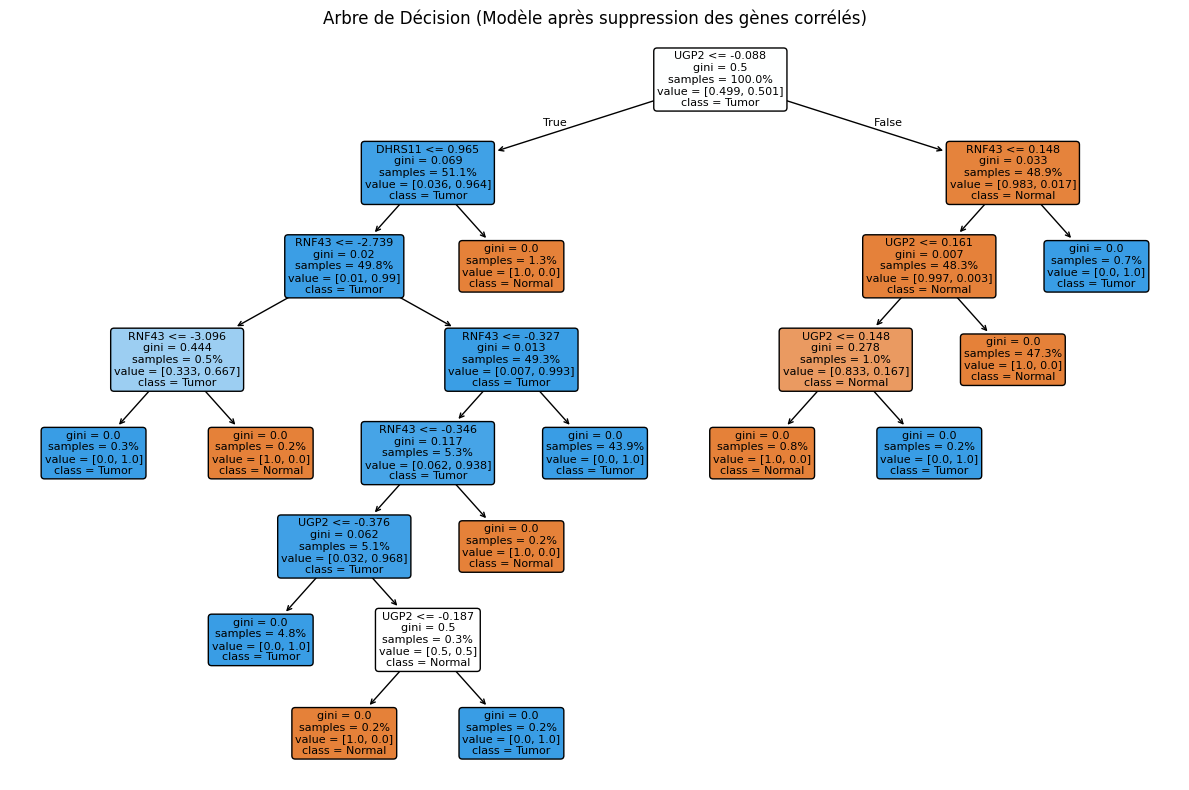

In [53]:
from sklearn.tree import plot_tree

# Afficher l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model_dt_corr,
          filled=True,
          feature_names=X_reduced_dt.columns,
          class_names=['Normal', 'Tumor'], # Replace with your actual class names
          rounded=True,
          proportion=True)
plt.title("Arbre de Décision (Modèle après suppression des gènes corrélés)")
plt.tight_layout()
plt.show()

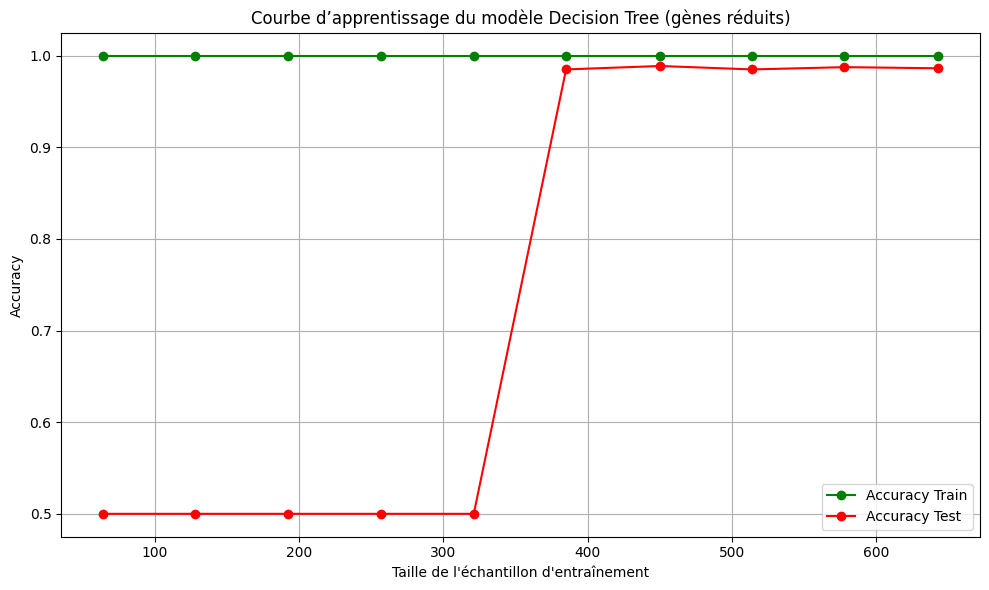

In [54]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import FitFailedWarning

# Ignorer les avertissements liés aux erreurs de fitting
warnings.filterwarnings('ignore', category=FitFailedWarning)

# Définir le modèle Decision Tree
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

# Calcul des courbes d'apprentissage
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    estimator=model_dt,
    X=X_reduced_dt,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Moyennes des scores
train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
test_scores_mean_dt = np.mean(test_scores_dt, axis=1)

# Tracer la courbe d’apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color='green', label='Accuracy Train')
plt.plot(train_sizes_dt, test_scores_mean_dt, 'o-', color='red', label='Accuracy Test')
plt.title('Courbe d’apprentissage du modèle Decision Tree (gènes réduits)')
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


# Randem forset pour classer les échantillons sur toutes ensembles de données par la sélection des features.

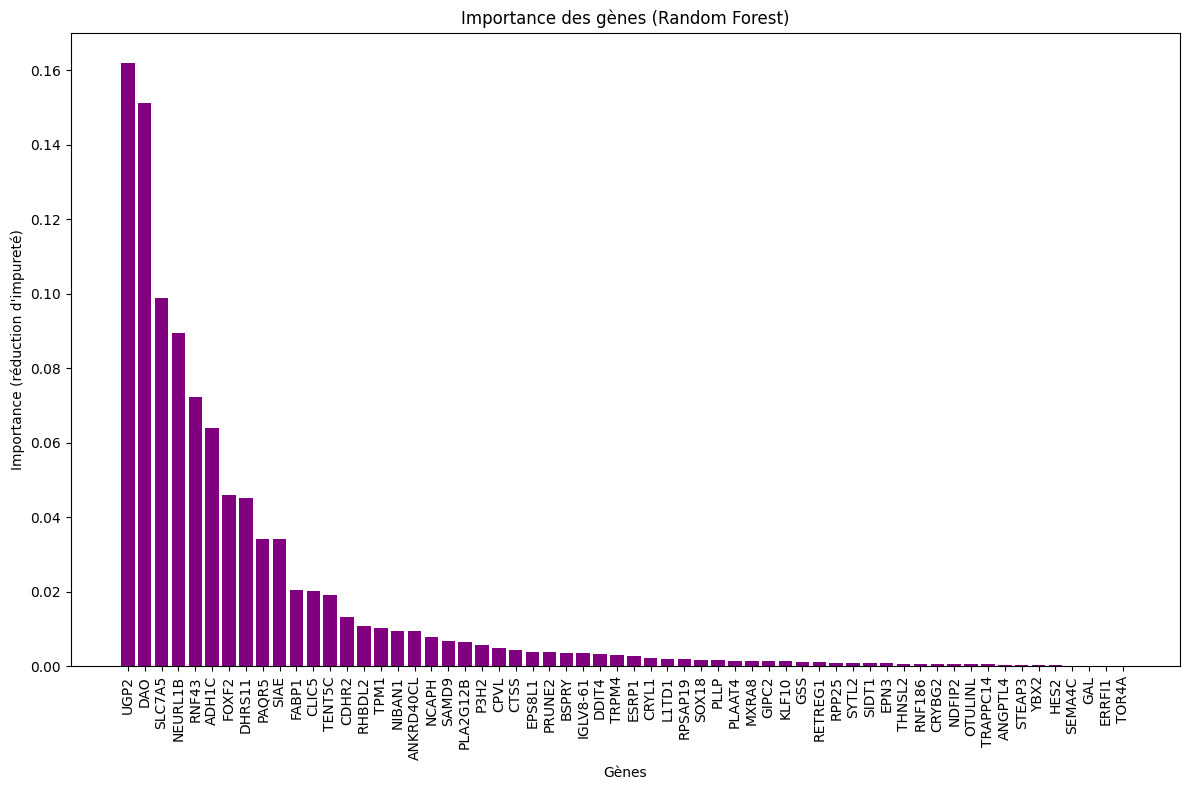

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Splitting data into train and test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_centered, y, test_size=0.25, random_state=42)

# Initialize and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Calculate permutation importance
result_rf = permutation_importance(
    rf, X_train_rf, y_train_rf, n_repeats=60, random_state=42
)

# Extraire l’importance des features (valeurs absolues des importances)
importances_abs_rf = rf.feature_importances_

# Créer un DataFrame avec les importances
importances_df_rf = pd.DataFrame({
    'Gene': X_centered.columns,
    'Importance': importances_abs_rf
}).sort_values(by='Importance', ascending=False)

# Affichage des 60 gènes les plus importants selon Random Forest
plt.figure(figsize=(12, 8))
plt.bar(importances_df_rf['Gene'][:60], importances_df_rf['Importance'][:60], color='purple')
plt.title("Importance des gènes (Random Forest)")
plt.xlabel("Gènes")
plt.ylabel("Importance (réduction d'impureté)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


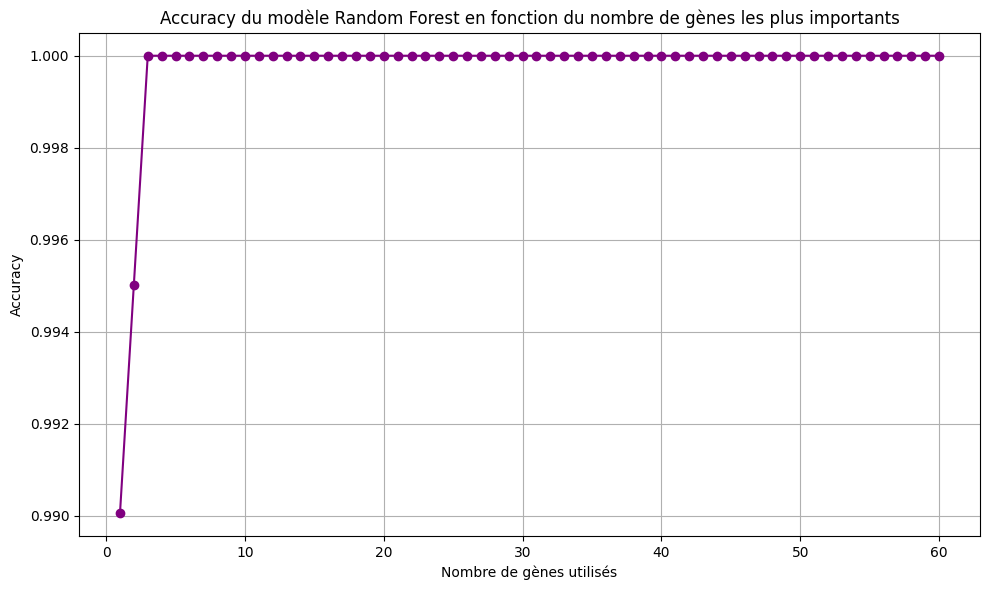

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Re-séparation pour cohérence
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_centered, y, test_size=0.25, random_state=42)

accuracies_rf = []
gene_counts = list(range(1, 61))

# Tri des gènes selon l’importance (feature_importances_)
importance_df_rf_sorted = importances_df_rf.sort_values(by='Importance', ascending=False)

for n in gene_counts:
    top_genes = importance_df_rf_sorted['Gene'].head(n).values
    X_train_top = X_train_rf[top_genes]
    X_test_top = X_test_rf[top_genes]

    model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model_rf.fit(X_train_top, y_train_rf)
    y_pred = model_rf.predict(X_test_top)
    acc = accuracy_score(y_test_rf, y_pred)
    accuracies_rf.append(acc)

# Affichage de la courbe accuracy
plt.figure(figsize=(10, 6))
plt.plot(gene_counts, accuracies_rf, marker='o', color='purple')
plt.title("Accuracy du modèle Random Forest en fonction du nombre de gènes les plus importants")
plt.xlabel("Nombre de gènes utilisés")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# 1. Récupération des 3 gènes les plus importants selon Random Forest
top_genes_rf = importances_df_rf.sort_values(by='Importance', ascending=False)['Gene'].head(5).values
X_top_rf = X_centered[top_genes_rf]

# 2. Affichage du DataFrame correspondant
print("Dataset des 3 gènes les plus importants selon Random Forest :")
X_top_rf.head()


Dataset des 3 gènes les plus importants selon Random Forest :


,UGP2,DAO,SLC7A5,NEURL1B,RNF43
0,1.504818,1.246949,-0.649317,0.449203,-0.334810
1,0.761124,0.941630,-1.443990,0.271003,-0.574077
2,1.360048,0.786009,-1.325314,0.531318,-1.128903
3,1.523391,0.786009,-2.156047,0.635444,-0.920843
4,0.379990,0.837883,-0.375904,0.765601,-0.712784


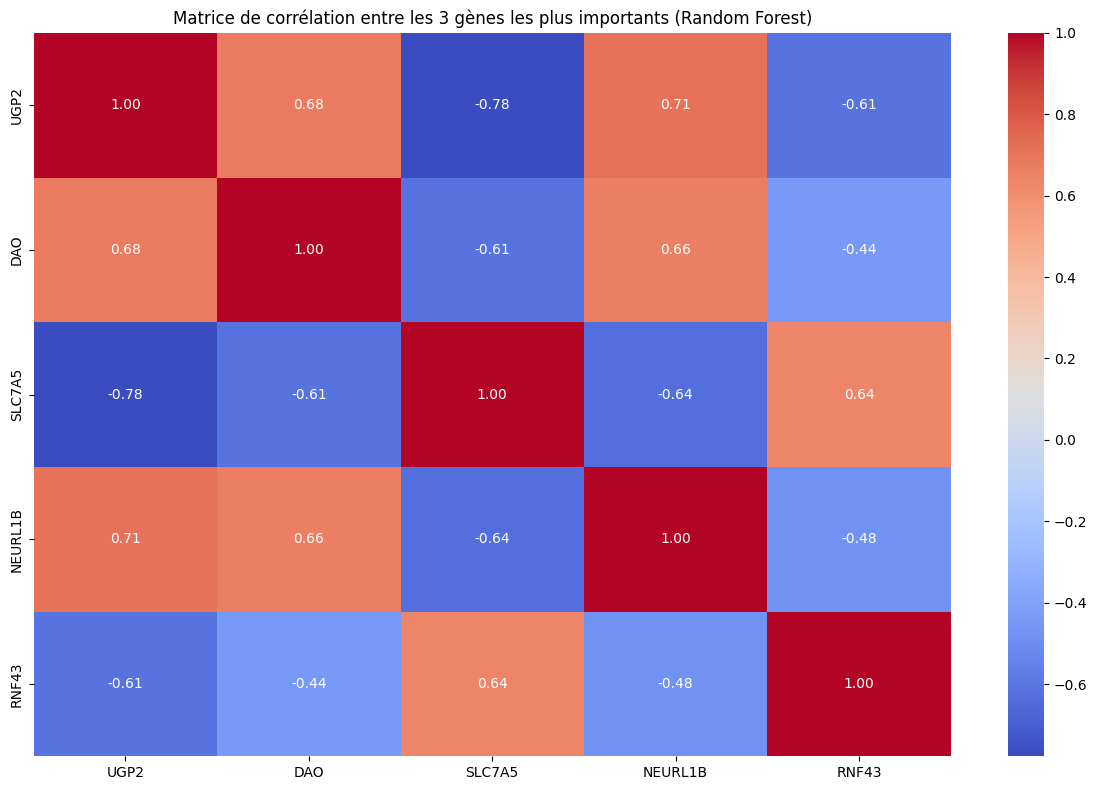

In [58]:
# 2. Construction de la matrice de corrélation pour Random Forest
correlation_matrix_rf = X_top_rf.corr()

# Optionnel : afficher sous forme de carte de chaleur
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_rf, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les 3 gènes les plus importants (Random Forest)")
plt.tight_layout()
plt.show()


In [59]:
# Seuil de corrélation
threshold = 0.70

# 1. Matrice de corrélation absolue pour Random Forest
corr_matrix_rf = X_top_rf.corr().abs()

# 2. Supprimer la diagonale (corrélation avec soi-même)
upper_rf = corr_matrix_rf.where(np.triu(np.ones(corr_matrix_rf.shape), k=1).astype(bool))

# 3. Initialiser la liste de gènes à garder
genes_to_keep_rf = set(X_top_rf.columns)

# 4. Dictionnaire d'importance des gènes (basé sur Random Forest)
importance_dict_rf = importances_df_rf.set_index('Gene')['Importance'].to_dict()

# 5. Supprimer les gènes trop corrélés en gardant le plus important
for col in upper_rf.columns:
    for row in upper_rf.index:
        if pd.notna(upper_rf.loc[row, col]) and upper_rf.loc[row, col] > threshold:
            if row in genes_to_keep_rf and col in genes_to_keep_rf:
                if importance_dict_rf.get(row, 0) >= importance_dict_rf.get(col, 0):
                    genes_to_keep_rf.discard(col)
                else:
                    genes_to_keep_rf.discard(row)

# 6. Nouveau DataFrame réduit
X_reduced_rf = X_top_rf[list(genes_to_keep_rf)]

# 7. Affichage
print(f"Gènes conservés après suppression basée sur l'importance et la corrélation (Random Forest) : {len(X_reduced_rf.columns)}")
print(f"Gènes supprimés : {set(X_top_rf.columns) - genes_to_keep_rf}")

# 8. Affichage du DataFrame réduit
X_reduced_rf.head()


Gènes conservés après suppression basée sur l'importance et la corrélation (Random Forest) : 3
Gènes supprimés : {'SLC7A5', 'NEURL1B'}


,RNF43,DAO,UGP2
0,-0.334810,1.246949,1.504818
1,-0.574077,0.941630,0.761124
2,-1.128903,0.786009,1.360048
3,-0.920843,0.786009,1.523391
4,-0.712784,0.837883,0.379990


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Étape 1 : Séparer les données
X_train_rf_corr, X_test_rf_corr, y_train_rf_corr, y_test_rf_corr = train_test_split(
    X_reduced_rf, y, test_size=0.25, random_state=42
)

# Étape 2 : Entraînement du modèle Random Forest
model_rf_corr = RandomForestClassifier(random_state=42)
model_rf_corr.fit(X_train_rf_corr, y_train_rf_corr)

# Étape 3 : Prédictions
y_pred_rf_corr = model_rf_corr.predict(X_test_rf_corr)

# Étape 4 : Accuracy
accuracy_rf_corr = accuracy_score(y_test_rf_corr, y_pred_rf_corr)
print(f"\n Accuracy du modèle Random Forest après suppression des gènes corrélés (seuil 0.70) : {accuracy_rf_corr:.4f}")



 Accuracy du modèle Random Forest après suppression des gènes corrélés (seuil 0.70) : 1.0000


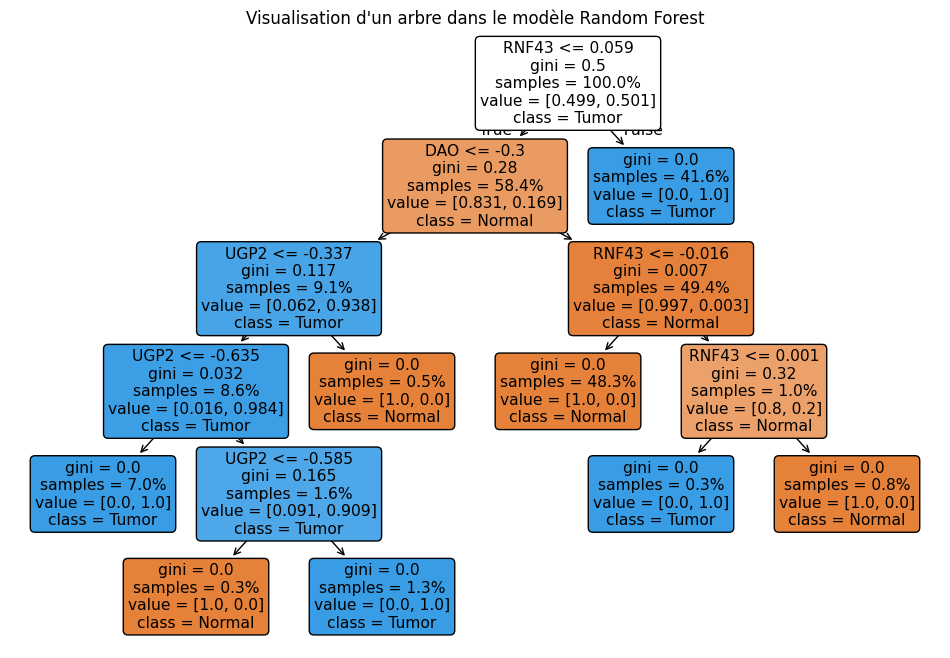

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the individual trees in the Random Forest
estimator = model_rf_corr.estimators_[0]  # Get the first tree (you can change the index)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(estimator,
          filled=True,
          feature_names=X_reduced_rf.columns,
          class_names=['Normal', 'Tumor'], # Replace with your actual class names
          rounded=True,
          proportion=True)
plt.title("Visualisation d'un arbre dans le modèle Random Forest")
plt.show()

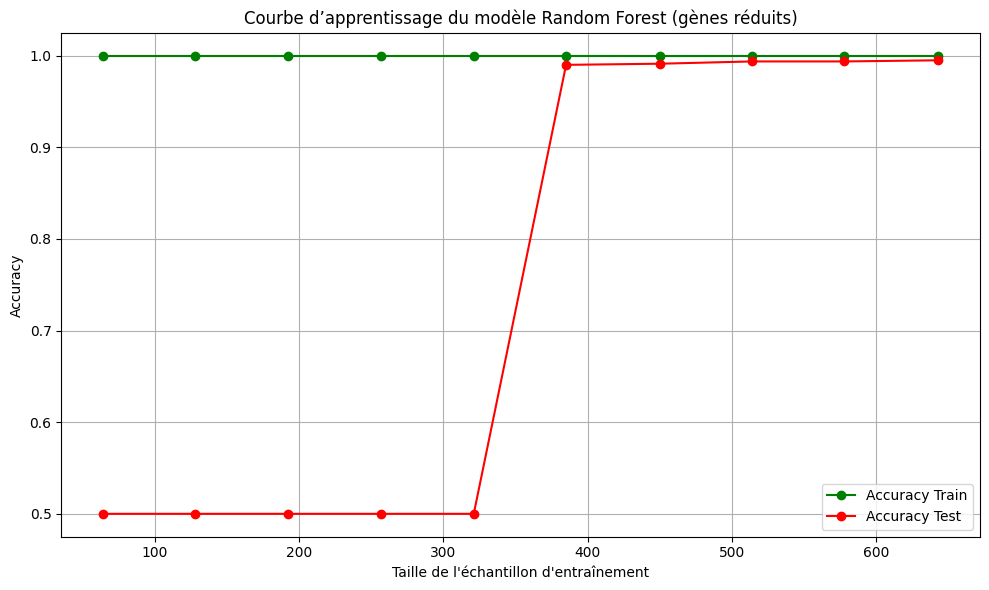

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import FitFailedWarning

# Ignorer les avertissements liés aux erreurs de fitting
warnings.filterwarnings('ignore', category=FitFailedWarning)

# Définir le modèle Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Calcul des courbes d'apprentissage
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    estimator=model_rf,
    X=X_reduced_rf,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Moyennes des scores
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)

# Tracer la courbe d’apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color='green', label='Accuracy Train')
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color='red', label='Accuracy Test')
plt.title('Courbe d’apprentissage du modèle Random Forest (gènes réduits)')
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
import pandas as pd
import numpy as np

# Chargement des données
df = pd.read_csv('colon_cancer.csv', sep=';')

# Fonction pour ajouter du bruit
def ajouter_bruit(df, bruit_intensite=0.01):
    df_bruit = df.copy()
    for col in df_bruit.select_dtypes(include=[np.number]).columns:
        bruit = np.random.normal(0, bruit_intensite * df_bruit[col].std(), size=df_bruit.shape[0])
        df_bruit[col] += bruit
    return df_bruit

# Ajouter du bruit avec une intensité de 1%
df_bruit = ajouter_bruit(df, bruit_intensite=0.01)

# Afficher les premières lignes
print(df_bruit.head())


# Sauvegarder le DataFrame avec bruit dans un nouveau fichier CSV
df_bruit.to_csv('colon_cancer_bruit.csv', sep=';', index=False)

print("Le fichier 'colon_cancer_bruit.csv' a été créé avec succès !")


      ADH1C    DHRS11      UGP2    SLC7A5      CTSS       DAO    NIBAN1  \
0  8.677818  6.081579  7.096570  3.781115  8.072276  8.253710  1.201266   
1  7.591112  6.186038  6.279344  3.068192  6.487310  8.035643  6.039927   
2  8.100476  5.692972  7.021235  3.118657  7.884151  7.980921  1.706261   
3  9.130506  5.882413  7.118830  2.308225  5.542191  7.785691  3.455068   
4  5.728668  5.750858  6.096667  4.241690  5.698718  7.676680  3.387919   

     PRUNE2     FOXF2    TENT5C  ...     BSPRY     CDHR2    ERRFI1     CLIC5  \
0  0.932875  2.998106  6.370784  ...  5.683451  3.422933  2.924966  5.209073   
1  1.472729  2.982490  4.655559  ...  5.606725  4.817179  4.776541  5.358070   
2  2.314866  3.108791  4.335473  ...  4.625215  5.479726  3.991925  6.677975   
3  3.370228  3.214557  4.920513  ...  3.984557  5.320647  4.554368  4.867203   
4  5.263437  4.141548  5.308964  ...  3.813476  6.101125  4.780831  4.308429   

       PLLP       GAL     CRYL1      YBX2   ANGPTL4  tissue_status  